In [404]:
path='C:/Users\dmckenzie\OneDrive - DLR Group\Desktop\FCI report 220228.csv'

In [1]:
path='C:/Users\dmckenzie\Downloads\FCI report 220309.csv'

In [12]:
path='C:/Users\dmckenzie\Downloads\FCI updated 220405.csv'

In [13]:
import pandas as pd

In [14]:
import gensim
from dandy import *

In [15]:
DF=pd.read_csv(path)

In [16]:
len(DF)

568

In [55]:
p2='C:/Users/dmckenzie/Downloads/00 PRDE School Data List_Jan-25-2022 V.1 (2).xlsx'
PR=pd.read_excel(p2,sheet_name='Consolidated',header=1)

In [56]:
pathPR='C:/Users\dmckenzie\Downloads\ALLPRSchools.csv'
#pathPR='C:/Users/dmckenzie/OneDrive - DLR Group/Desktop/'
#PR=pd.read_csv(pathPR)
PR['CODE']=PR['CODE'].astype(str)
DF2=DF.set_index('Header_schoolid').join(PR.set_index('CODE'))

In [63]:
DF['Header_schoolid']

,Unnamed: 0,Header_schoolid,Header_schoolname,Header_yearbuilt,Header_enrolment,HeaderDD_isshelter,Header_bldgsqft,Header_asssqft,Header_numstories,Header_assessdate,...,EXST_BUILDING_SECURE_NOTE,EXST_CAMPUS_ACCESS_NOTE,EXST_OP_WALLS_NOTE,EXST_STORAGE_NOTE,EXST_CLASSRM_SINK_NOTE,EXST_WRTBL_SURFACE_NOTE,EXST_CAMPUS_LAYOUT_NOTE,EXST_ADMIN_NOTE,Combo,Combo2
0,10173_FCI_BI_COTTO (ANEXO).pdf,10173,COTTO (ANEXO),1942.0,31.0,NaN,13037.0,Enter Sq. Ft.,1,3/29/2022,...,additional notes,"Sloping walks to all buildings, but high sills...","Two, dividing three classrooms.",One small storage room. Using abandoned build...,SPED and Autism rooms where noted.,One large marker board,One story bars.,"Psych and speech therapy, social worker,nurse,...","sped-only building, 5 to 22 years old, seven d...","sped-only building, 5 to 22 years old, seven d..."
1,10314_FCI_BI_JULIO SEIJO.pdf,10314,JULIO SEIJO,1930.0,175.0,PRIMARY,20393.0,Enter Sq. Ft.,1,03/25/2022,...,additional notes,additional notes,additional notes,additional notes,additional notes,additional notes,additional notes,additional notes,60% of the built environment on campus is in ...,@@ 60% of the built environment on campus is ...
2,10322_FCI_BI_SU ENRIQUE DE JESUS BORRAS.pdf,10322,SU ENRIQUE DE JESUS BORRAS,1948.0,214.0,PRIMARY,41731.0,Enter Sq. Ft.,2,3/30/2022,...,"6' cl fence with barbed wire, but some damage ...",Low sills. ADA hardware at admin. Padlocks a...,additional notes,Portable units. Cabinets removed due to termi...,additional notes,One large marker board,One and two story bars,"Reception waiting, director, toilets, secretar...","k-8\r\nautism, therapy \r\nrefuge area 100% o...","k-8\r\nautism, therapy \r\nrefuge area @@ 100..."
3,10355_FCI_BI_JOHN W HARRIS.pdf,10355,JOHN W HARRIS,1946.0,231.0,NaN,65455.0,Enter Sq. Ft.,2,3/29/2022,...,6' cl fence with barbed wire.,Ramps to ground floors but only one to upper f...,additional notes,Cabinets removed due to termites. Portable un...,Kindergarten and SPED rooms,One large marker board,"One and two story bars, one story interior cor...","Reception waiting, director, health, storage.",wall tie-in to column work done.\r\npk - 5.\r\...,wall tie-in to column work done.\r\npk - 5.\r\...
4,10439_FCI_BI_DR CAYETANO COLL Y TOSTE.pdf,10439,DR CAYETANO COLL Y TOSTE,1950.0,547.0,PRIMARY,110436.0,Enter Sq. Ft.,3,3/30/2022,...,"Secure vestibule, and 6' cl fence with barbed ...","ADA hardware and sills , elevator",Exterior slide door opens up to outdoor stage ...,Portable units in classrooms,additional notes,One large marker board,Three story courtyard,"Reception waiting, director, secretary, storag...",k- 8.\r\nactually built in 2011 - new! 100% of...,k- 8.\r\nactually built in 2011 - new! @@ 100%...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,78253-FCI-NUEVA ELEMENTAL URBANA DE GUAYNABO.pdf,78253,NUEVA ELEMENTAL URBANA DE GUAYNABO,1995.0,380.0,NaN,85660.0,Enter Sq. Ft.,1,3/3/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,theater closed since maria. \r\ncentral ac not...,theater closed since maria. \r\ncentral ac not...
564,78733-FCI-FRANCISCO GAZTAMBIDE VEGA (1).pdf,78733,FRANCISCO GAZTAMBIDE VEGA,1997.0,443.0,NaN,46142.0,Enter Sq. Ft.,2,2/10/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166 sped students arts and science classes 10...,166 sped students arts and science classes @@...
565,78733-FCI-FRANCISCO GAZTAMBIDE VEGA.pdf,78733,FRANCISCO GAZTAMBIDE VEGA,1997.0,443.0,NaN,46142.0,Enter Sq. Ft.,2,2/10/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166 sped students arts and science classes 10...,166 sped students arts and science classes @@...
566,78832-FCI-MARTIN GARCIA GIUSTI.pdf,78832,MARTIN GARCIA GIUSTI,1995.0,352.0,PRIMARY,53089.0,Enter Sq. Ft.,2,2/11/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"338 students, 26 teachers, 17 staff. (15 sped ...","338 students, 26 teachers, 17 staff. (15 sped ..."


In [57]:
data=DF2.reset_index()

In [62]:
PR['GRADES']

0      9 10 11 12   EES
1           K 1 2 3 4 5
2            9 10 11 12
3      6 7 8 9 10 11 12
4                 6 7 8
             ...       
848          9 10 11 12
849      7 8 9 10 11 12
850      6 7 8      EEI
851               6 7 8
852      6 7 8      EEI
Name: GRADES, Length: 853, dtype: object

In [58]:
data['GT']=data['GRADES'].str.replace('EEE','').str.replace('EEI','').str.replace('EES','').str.replace('PK','').str.split().apply(' '.join)
lastelm=[]
for i in data['GT'].str.split():
    if len(i)<2:
        lastelm.append('')    
    else:
        lastelm.append(i[-1])
    
        
#data['Gfirst']=firstelm
data['Glast']=lastelm
data['GT2']=np.where(data['GT']=='','Missing',data['GT'])
firstelm=[]
for i in data['GT2'].str.split():
    firstelm.append(i[0])
    
data['Gfirst']=firstelm
data['Glast2']=np.where(data['Glast']=='','1000',data['Glast'])
data['Simp']=data['Gfirst']+" "+data['Glast2']
data['Simp2']=np.where((data['Glast2'].astype(int)<=5) | (data['Simp']=='K 1000'),'Elem',
            np.where((data['Glast2'].isin(['6','7','8','9'])) & 
                     (data['Gfirst'].isin(['K','1','2','3'])),
                     'Elem2Middle',
                    np.where((data['Simp']=='6 8') | 
                            (data['Simp']=='6 9')  |
                             (data['Simp']=='4 6') |
                             (data['Simp']=='4 8') |
                             (data['Simp']=='7 9') |
                             (data['Simp']=='6 7'),'Middle',
                            np.where((data['Glast2'].isin(['10','11','12'])) &
                                     (data['Gfirst'].isin(['5','6','7'])) ,
                                     'Middle2High',
                                    np.where((data['Glast2'].isin(['10','11','12'])) & 
                                     (data['Gfirst'].isin(['K','1','2','3','4'])),'Elem2High',
                                             np.where((data['Glast2'].isin(['10','11','12'])) &
                                                      (data['Gfirst'].isin(['8','9','10','11'])),
                                                      'High School',
                                                      np.where((data['Gfirst'].isin(['13','14','ADULTOS'])),
                                                      'Adult','Other')))))))
data['Simp2']=np.where(data['GT']=='','All Sped',data['Simp2'])

TypeError: can only join an iterable

In [52]:
np.random.choice(DF2['index'],10)

array([57182, 15446, 15024, 13318, 62554, 71571, 65094, 46086, 47951,
       32268], dtype=int64)

In [40]:
DF

,Unnamed: 0,Header_schoolid,Header_schoolname,Header_yearbuilt,Header_enrolment,HeaderDD_isshelter,Header_bldgsqft,Header_asssqft,Header_numstories,Header_assessdate,...,EXST_BUILDING_SECURE_NOTE,EXST_CAMPUS_ACCESS_NOTE,EXST_OP_WALLS_NOTE,EXST_STORAGE_NOTE,EXST_CLASSRM_SINK_NOTE,EXST_WRTBL_SURFACE_NOTE,EXST_CAMPUS_LAYOUT_NOTE,EXST_ADMIN_NOTE,Combo,Combo2
0,10173_FCI_BI_COTTO (ANEXO).pdf,10173,COTTO (ANEXO),1942.0,31.0,NaN,13037.0,Enter Sq. Ft.,1,3/29/2022,...,additional notes,"Sloping walks to all buildings, but high sills...","Two, dividing three classrooms.",One small storage room. Using abandoned build...,SPED and Autism rooms where noted.,One large marker board,One story bars.,"Psych and speech therapy, social worker,nurse,...","sped-only building, 5 to 22 years old, seven d...","sped-only building, 5 to 22 years old, seven d..."
1,10314_FCI_BI_JULIO SEIJO.pdf,10314,JULIO SEIJO,1930.0,175.0,PRIMARY,20393.0,Enter Sq. Ft.,1,03/25/2022,...,additional notes,additional notes,additional notes,additional notes,additional notes,additional notes,additional notes,additional notes,60% of the built environment on campus is in ...,@@ 60% of the built environment on campus is ...
2,10322_FCI_BI_SU ENRIQUE DE JESUS BORRAS.pdf,10322,SU ENRIQUE DE JESUS BORRAS,1948.0,214.0,PRIMARY,41731.0,Enter Sq. Ft.,2,3/30/2022,...,"6' cl fence with barbed wire, but some damage ...",Low sills. ADA hardware at admin. Padlocks a...,additional notes,Portable units. Cabinets removed due to termi...,additional notes,One large marker board,One and two story bars,"Reception waiting, director, toilets, secretar...","k-8\r\nautism, therapy \r\nrefuge area 100% o...","k-8\r\nautism, therapy \r\nrefuge area @@ 100..."
3,10355_FCI_BI_JOHN W HARRIS.pdf,10355,JOHN W HARRIS,1946.0,231.0,NaN,65455.0,Enter Sq. Ft.,2,3/29/2022,...,6' cl fence with barbed wire.,Ramps to ground floors but only one to upper f...,additional notes,Cabinets removed due to termites. Portable un...,Kindergarten and SPED rooms,One large marker board,"One and two story bars, one story interior cor...","Reception waiting, director, health, storage.",wall tie-in to column work done.\r\npk - 5.\r\...,wall tie-in to column work done.\r\npk - 5.\r\...
4,10439_FCI_BI_DR CAYETANO COLL Y TOSTE.pdf,10439,DR CAYETANO COLL Y TOSTE,1950.0,547.0,PRIMARY,110436.0,Enter Sq. Ft.,3,3/30/2022,...,"Secure vestibule, and 6' cl fence with barbed ...","ADA hardware and sills , elevator",Exterior slide door opens up to outdoor stage ...,Portable units in classrooms,additional notes,One large marker board,Three story courtyard,"Reception waiting, director, secretary, storag...",k- 8.\r\nactually built in 2011 - new! 100% of...,k- 8.\r\nactually built in 2011 - new! @@ 100%...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,78253-FCI-NUEVA ELEMENTAL URBANA DE GUAYNABO.pdf,78253,NUEVA ELEMENTAL URBANA DE GUAYNABO,1995.0,380.0,NaN,85660.0,Enter Sq. Ft.,1,3/3/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,theater closed since maria. \r\ncentral ac not...,theater closed since maria. \r\ncentral ac not...
564,78733-FCI-FRANCISCO GAZTAMBIDE VEGA (1).pdf,78733,FRANCISCO GAZTAMBIDE VEGA,1997.0,443.0,NaN,46142.0,Enter Sq. Ft.,2,2/10/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166 sped students arts and science classes 10...,166 sped students arts and science classes @@...
565,78733-FCI-FRANCISCO GAZTAMBIDE VEGA.pdf,78733,FRANCISCO GAZTAMBIDE VEGA,1997.0,443.0,NaN,46142.0,Enter Sq. Ft.,2,2/10/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166 sped students arts and science classes 10...,166 sped students arts and science classes @@...
566,78832-FCI-MARTIN GARCIA GIUSTI.pdf,78832,MARTIN GARCIA GIUSTI,1995.0,352.0,PRIMARY,53089.0,Enter Sq. Ft.,2,2/11/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"338 students, 26 teachers, 17 staff. (15 sped ...","338 students, 26 teachers, 17 staff. (15 sped ..."


In [17]:
#DF=DF.assign(b=DF['Unnamed: 0'].str[:5]).drop_duplicates(subset='b').drop(columns={'b'})

In [18]:
len(DF.columns.str.contains('other'))

236

In [19]:
OtherList=pd.DataFrame({'Col':DF.columns,
              'Note':DF.columns.str.lower().str.contains('|'.join(['note','other','info']))*1}).\
    query('Note==1')['Col'].tolist()

In [20]:
OtherList 

['HeaderDD_addnotes',
 'GENINFO_primary',
 'GENINFO_allstr',
 'GENINFO_Onsiteparking',
 'GENINFO_Campusaccess',
 'GENINFO_existingbldgstock',
 'GENINFO_utilitieselec',
 'GENINFO_utilitiesinternet',
 'GENINFO_openspace',
 'GENINFO_conditexistbldg',
 'GENINFO_other',
 'GENINFO_sitedrain',
 'SITE_other',
 'STRUCTURE_other',
 'GBS_Other',
 'HVAC_ACother',
 'HVAC_ventother',
 'HVAC_exhaustother',
 'ELEC_other',
 'PLUMB_other',
 'FS_other',
 'other_othercomments',
 'EXST_TYP CLASSRM_NOTE',
 'EXST_SPED RM_NOTE',
 'EXST_ART CLASSRM_NOTE',
 'EXST_MUSIC RM_NOTE',
 'EXST_LIBRARY_NOTE',
 'EXST_CAFETERIA_NOTE',
 'EXST_GYM_NOTE',
 'EXST_HEALTHRM_NOTE',
 'EXST_CTE_NOTE',
 'EXST_PERFORM ART_NOTE',
 'EXST_AUDITORIUM_NOTE',
 'EXST_PBL_NOTE',
 'EXST_BUILDING_SECURE_NOTE',
 'EXST_CAMPUS_ACCESS_NOTE',
 'EXST_OP_WALLS_NOTE',
 'EXST_STORAGE_NOTE',
 'EXST_CLASSRM_SINK_NOTE',
 'EXST_WRTBL_SURFACE_NOTE',
 'EXST_CAMPUS_LAYOUT_NOTE',
 'EXST_ADMIN_NOTE']

In [21]:
counts2=[]
for i in DF.columns:
    counts2.append((DF[i].astype(str).str.lower().str.contains('sqft').sum())*1)
NameFrame2=pd.DataFrame({'Name':DF.columns,'Notes':counts2})
NameFrame2[NameFrame2['Notes']>0]

,Name,Notes
18,HeaderDD_addnotes,2


In [22]:
counts2=[]
for i in DF.columns:
    counts2.append((DF[i].astype(str).str.lower().str.contains('replace').sum())*1)
NameFrame2=pd.DataFrame({'Name':DF.columns,'Notes':counts2})
NameFrame2[NameFrame2['Notes']>0]

,Name,Notes
18,HeaderDD_addnotes,26
40,SITE_parking,57
41,SITE_loading,92
43,SITE_walkways,211
44,SITE_extlight,8
45,SITE_fencing,6
63,STRUCTURE_other,6
70,GBS_roof,97
71,GBS_stormwtrsys,152
72,GBS_walls,46


In [23]:
DF[DF['HeaderDD_addnotes'].astype(str).str.lower().str.contains('verif')]['HeaderDD_addnotes'].tolist()

['One separate small storage building has quite a bit of structural damage - cracking beams/ roof deck spalling. \r\nVerify square footage, MUCH LESS than 60K',
 'K-8 \r\nAbout 2 classroom for autism  About 9 students\r\nVerify square footage, it has grown overtime\r\nAmazing site with lots of potential for outdoor learning, very unique; tall old trees and a creek goes through school!!\r\nRecommended for Modernization',
 '368 students \r\n\r\nVerify Square Footage',
 'Verify Square Footage\r\n\r\n232 kids total.\r\nDirector mentioned this was a 21st century school, can confirm this did not feel at all like a 21st century school.\r\n\r\nA section of the school cannot be used due to structural concerns. A total of 6 classrooms are vacant. School needs storage',
 'Verify Square footage',
 'Add any additional notes.\r\nSchool is 21 st century school with good furniture and good condition \r\n\r\nVerify Square Footage',
 'Verify square footage',
 'Verify square footage\r\nBasketball court i

In [24]:
counts2=[]
for i in DF.columns:
    counts2.append((DF[i].astype(str).str.lower().str.contains('struct').sum())*1)
NameFrame2=pd.DataFrame({'Name':DF.columns,'Notes1':counts2})
NameFrame2[NameFrame2['Notes1']>0]

,Name,Notes1
18,HeaderDD_addnotes,82
28,GENINFO_allstr,1
31,GENINFO_existingbldgstock,1
33,GENINFO_utilitiesinternet,3
35,GENINFO_conditexistbldg,2
36,GENINFO_other,3
56,STRUCTURE_foundation,1
57,STRUCTURE_columns,1
58,STRUCTURE_strwalls,478
59,STRUCTURE_flrslab,1


In [25]:
counts2=[]
for i in DF.columns:
    counts2.append((DF[i].astype(str).str.lower().str.contains('earthquake').sum())*1)
NameFrame2=pd.DataFrame({'Name':DF.columns,'Notes':counts2})
NameFrame2[NameFrame2['Notes']>0]

,Name,Notes
18,HeaderDD_addnotes,19
63,STRUCTURE_other,8
77,GBS_rampcondit,1
88,GBS_Other,2
174,other_othercomments,2
225,EXST_PERFORM ART_NOTE,1


In [26]:
counts2=[]
for i in DF.columns:
    counts2.append((DF[i].astype(str).str.lower().str.contains('foot').sum())*1)
NameFrame2=pd.DataFrame({'Name':DF.columns,'Notes':counts2})
NameFrame2[NameFrame2['Notes']>0]

,Name,Notes
7,Header_asssqft,1
18,HeaderDD_addnotes,65
233,EXST_WRTBL_SURFACE_NOTE,6


In [27]:
counts2=[]
for i in DF.columns:
    counts2.append((DF[i].astype(str).str.lower().str.contains('leak').sum())*1)
NameFrame2=pd.DataFrame({'Name':DF.columns,'Notes':counts2})
NameFrame2[NameFrame2['Notes']>0]

,Name,Notes
18,HeaderDD_addnotes,29
36,GENINFO_other,1
46,SITE_playgrs,2
55,SITE_other,2
63,STRUCTURE_other,8
70,GBS_roof,11
72,GBS_walls,2
73,GBS_mold,3
79,GBS_ceilings,3
80,GBS_flrs,2


In [28]:
counts2=[]
for i in DF.columns:
    counts2.append((DF[i].astype(str).str.lower().str.contains('safety').sum())*1)
NameFrame2=pd.DataFrame({'Name':DF.columns,'Notes':counts2})
NameFrame2[NameFrame2['Notes']>0]

,Name,Notes
18,HeaderDD_addnotes,8
45,SITE_fencing,1
63,STRUCTURE_other,1
222,EXST_GYM_NOTE,2


In [29]:
counts=[]
for i in DF.columns:
    counts.append((DF[i].astype(str).str.lower().str.contains('notes').sum()>10)*1)

NameFrame=pd.DataFrame({'Name':DF.columns,'Notes':counts})
namelist=NameFrame[NameFrame['Notes']==1]['Name'].to_list()
DF['Combo']=DF[namelist].apply(lambda x: x.astype(str).str.lower()).\
    apply(lambda x: x.astype(str).str.replace('add any additional notes.','blank')).\
    apply(lambda x: x.astype(str).str.replace('additional notes.','blank')).\
    apply(lambda row: ' '.join(row.values.astype(str)), axis=1).str.replace('blank','')


C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


In [30]:
DF['Combo2']=DF[namelist].apply(lambda x: x.astype(str).str.lower()).\
    apply(lambda x: x.astype(str).str.replace('add any additional notes.','blank')).\
    apply(lambda x: x.astype(str).str.replace('additional notes.','blank')).\
    apply(lambda row: ' @@ '.join(row.values.astype(str)), axis=1).str.replace('blank','')

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
DF[(DF['HeaderDD_addnotes']!='Add any additional notes.') & (DF['HeaderDD_addnotes'].isna()==False)]['HeaderDD_addnotes'].drop_duplicates().reset_index()

,index,HeaderDD_addnotes
0,0,"SPED-only building, 5 to 22 years old, seven d..."
1,2,"K-8\r\nAutism, therapy \r\nRefuge area"
2,3,Wall tie-in to column work done.\r\nPk - 5.\r\...
3,4,K- 8.\r\nActually built in 2011 - new!
4,5,468 students \r\nK-8\r\nSped all day self cont...
...,...,...
441,560,146 students from k-8. (56 Sped students) 37 s...
442,562,Mix of multi and single story
443,563,Theater closed since Maria. \r\nCentral ac not...
444,564,166 sped students Arts and science classes


In [32]:
print(DF['HeaderDD_addnotes'].str.lower().str.contains('|'.join(['not in use','closed school','school closed','vacant','no students','abandon'])).sum() /len(DF))
print(DF['HeaderDD_addnotes'].str.lower().str.contains('|'.join(['damage','structural','earthquake','hurricane'])).sum()/len(DF))
print(DF['HeaderDD_addnotes'].str.lower().str.contains('|'.join(['shelter','refug'])).sum()/len(DF))
print(DF['HeaderDD_addnotes'].str.lower().str.contains('|'.join(['verify'])).sum()/len(DF))

0.15140845070422534
0.15140845070422534
0.035211267605633804
0.12323943661971831


In [33]:
len(DF['Combo'])

568

In [34]:
print(DF['Combo'].str.lower().str.contains('|'.join(['not in use','school closed','closed school','vacant','no students','abandon'])).sum() /len(DF))
print(DF['Combo'].str.lower().str.contains('|'.join(['damage','earthquake','hurricane'])).sum()/len(DF))
print(DF['Combo'].str.lower().str.contains('|'.join(['shelter','refug'])).sum()/len(DF))

0.19014084507042253
0.5105633802816901
0.04929577464788732


In [35]:
def lemmer(text):
    lemma_function = WordNetLemmatizer()

    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV

    return [lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(text)]
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from collections import defaultdict
from nltk.corpus import stopwords
stops=list(stopwords.words('english'))+['um','know','try','trying','get','\.',')','.','(','-',',','or','to','not','no',
                                        "that's","think",'say',
                                        "there's",'lot','go','back',
                                       "would",'yeah',"i'm",'also','even','way','got',
                                       'things','well','like','kind','something','actually','still','5',"one",
                                       'might','maybe','could','okay',"we've","they're","we're"]
def tokennamefilter(tokenlist,minlen=2):
    tokens = [x for x in tokenlist if x not in stops]
    return (tokens)

In [36]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from collections import defaultdict

In [37]:
from nltk.corpus import stopwords
stops=list(stopwords.words('english'))+['um','know','try','trying','get','\.',')','.','(','-',',','or','to','not','no',
                                        "that's","think",'say',
                                        "there's",'lot','go','back',
                                       "would",'yeah',"i'm",'also','even','way','got',
                                       'things','well','like','kind','something','actually','still','5',"one",
                                       'might','maybe','could','okay',"we've","they're","we're"]
def tokennamefilter(tokenlist,minlen=2):
    tokens = [x for x in tokenlist if x not in stops]
    return (tokens)

In [38]:
DF[DF['HeaderDD_addnotes'].isna()==False]['HeaderDD_addnotes']

0      SPED-only building, 5 to 22 years old, seven d...
1                              Add any additional notes.
2                K-8\r\nAutism, therapy \r\nRefuge area 
3      Wall tie-in to column work done.\r\nPk - 5.\r\...
4                 K- 8.\r\nActually built in 2011 - new!
                             ...                        
562                        Mix of multi and single story
563    Theater closed since Maria. \r\nCentral ac not...
564          166 sped students  Arts and science classes
565          166 sped students  Arts and science classes
566    338 students, 26 teachers, 17 staff. (15 sped ...
Name: HeaderDD_addnotes, Length: 567, dtype: object

In [39]:
temp=get_ngrams(DF[DF['Combo'].isna()==False].reset_index(drop=True)['Combo'].\
    astype('str').\
    str.lower().\
    str.replace("''",'').\
    str.replace('[^\w\s]',' ').\
    str.replace('[0-9]','').\
    apply(nltk.word_tokenize).\
    apply(tokennamefilter).\
    apply(' '.join),2)
temp[temp.iloc[:,0].str.contains('|'.join(['closed']))].\
    value_counts().reset_index().rename(columns={0:'Count'}).query("Count>=1")

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Combo,Count
0,size enclosed,72
1,enclosed spaced,72
2,closed school,9
3,closed due,8
4,classrooms closed,6
...,...,...
80,closed result,1
81,closed replace,1
82,closed repair,1
83,closed rain,1


In [29]:
temp=get_ngrams(DF[DF['Combo'].isna()==False].reset_index(drop=True)['Combo'].\
    astype('str').\
    str.lower().\
    str.replace("''",'').\
    str.replace('[^\w\s]',' ').\
    str.replace('[0-9]','').\
    apply(nltk.word_tokenize).\
    apply(tokennamefilter).\
    apply(' '.join),2)
temp[temp.iloc[:,0].str.contains('|'.join(['use']))].\
    value_counts().reset_index().rename(columns={0:'Count'}).query("Count>=2")

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Combo,Count
0,campus use,488
1,use served,477
2,lack use,45
3,use erosion,19
4,used due,15
...,...,...
59,need use,2
60,cafeteria used,2
61,use space,2
62,students used,2


In [30]:
temp=get_ngrams(DF[DF['Combo'].isna()==False].reset_index(drop=True)['Combo'].\
    astype('str').\
    str.lower().\
    str.replace("''",'').\
    str.replace('[^\w\s]',' ').\
    str.replace('[0-9]','').\
    apply(nltk.word_tokenize).\
    apply(tokennamefilter).\
    apply(' '.join),2)
temp[temp.iloc[:,0].str.contains('|'.join(['nearby']))].\
    value_counts().reset_index().rename(columns={0:'Count'}).query("Count>=2")

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Combo,Count
0,nearby school,2
1,relocated nearby,2


In [31]:
temp=get_ngrams(DF[DF['Combo'].isna()==False].reset_index(drop=True)['Combo'].\
    astype('str').\
    str.lower().\
    str.replace("''",'').\
    str.replace('[^\w\s]',' ').\
    str.replace('[0-9]','').\
    apply(nltk.word_tokenize).\
    apply(tokennamefilter).\
    apply(' '.join),3)
temp[temp.iloc[:,0].str.contains('|'.join(['reloc']))].\
    value_counts().reset_index().rename(columns={0:'Count'}).query("Count>=1")

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Combo,Count
0,relocated nearby school,2
1,students relocated nearby,2
2,equipments relocated de,1
3,expansion relocation due,1
4,frontage relocated drives,1
5,kitchen equipments relocated,1
6,need expansion relocation,1
7,prior relocation kids,1
8,relocated de school,1
9,relocated drives extensively,1


In [132]:
temp=get_ngrams(DF[DF['Combo'].isna()==False].reset_index(drop=True)['Combo'].\
    astype('str').\
    str.lower().\
    str.replace("''",'').\
    str.replace('[^\w\s]',' ').\
    str.replace('[0-9]','').\
    apply(nltk.word_tokenize).\
    apply(tokennamefilter).\
    apply(' '.join),2)
temp[temp.iloc[:,0].str.contains('|'.join(['reli']))].\
    value_counts().reset_index().rename(columns={0:'Count'}).query("Count>=1")

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Combo,Count
0,lack reliable,1
1,louver relief,1
2,outdated unreliable,1
3,power reliable,1
4,reliable causing,1
5,reliable strong,1
6,reliable water,1
7,relief ventilation,1
8,school reliable,1
9,unreliable yes,1


In [32]:
import nltk
import gensim
#sentsFCI=[nltk.word_tokenize(x) for x in DF['HeaderDD_addnotes'].astype('str').str.lower().apply(nltk.word_tokenize).apply(tokennamefilter) ]
sentsFCI=DF[DF['Combo'].isna()==False]['HeaderDD_addnotes'].astype('str').str.lower().str.replace('[^\w\s]',' ').\
    str.replace('[0-9]','').apply(nltk.word_tokenize)
#[x for x in sentsFCI if x not in ['the','a'] ]
model= gensim.models.Word2Vec(sentsFCI,min_count=2)
X= list(model.wv.vocab)


C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [33]:
#model.wv.most_similar('damage',topn=20)

In [34]:
model.wv.most_similar('abandoned',topn=25)

[('of', 0.9996857047080994),
 ('is', 0.9996762275695801),
 ('to', 0.9996670484542847),
 ('and', 0.9996598958969116),
 ('the', 0.9996434450149536),
 ('a', 0.9996380805969238),
 ('for', 0.9996354579925537),
 ('no', 0.9996318817138672),
 ('kitchen', 0.9996263980865479),
 ('but', 0.9996253252029419),
 ('some', 0.9996191263198853),
 ('not', 0.9996175169944763),
 ('structural', 0.9995993971824646),
 ('was', 0.9995936751365662),
 ('in', 0.9995925426483154),
 ('damage', 0.9995808601379395),
 ('school', 0.999579906463623),
 ('space', 0.9995670318603516),
 ('with', 0.9995600581169128),
 ('building', 0.9995551705360413),
 ('has', 0.9995473027229309),
 ('k', 0.9995414018630981),
 ('classrooms', 0.9995413422584534),
 ('from', 0.9995386004447937),
 ('that', 0.9995332956314087)]

In [35]:
model.wv.most_similar('vacant',topn=25)

[('for', 0.9984769821166992),
 ('roof', 0.9984602332115173),
 ('and', 0.9984378814697266),
 ('needs', 0.9984060525894165),
 ('school', 0.9983662366867065),
 ('building', 0.9983658790588379),
 ('no', 0.9983642101287842),
 ('to', 0.9983603954315186),
 ('structural', 0.998358964920044),
 ('short', 0.9983538389205933),
 ('in', 0.998340368270874),
 ('issues', 0.9983175992965698),
 ('with', 0.9983172416687012),
 ('the', 0.9983051419258118),
 ('not', 0.9982932806015015),
 ('buildings', 0.9982866644859314),
 ('is', 0.9982858896255493),
 ('have', 0.9982854127883911),
 ('closed', 0.9982789754867554),
 ('of', 0.9982708692550659),
 ('from', 0.998253583908081),
 ('damage', 0.9982509016990662),
 ('space', 0.9982478618621826),
 ('biggest', 0.9982378482818604),
 ('double', 0.9982143044471741)]

In [36]:
model.wv.most_similar('closed',topn=25)

[('and', 0.9995965957641602),
 ('sped', 0.9995599985122681),
 ('a', 0.9995478391647339),
 ('for', 0.9995454549789429),
 ('school', 0.9995260238647461),
 ('of', 0.9995259642601013),
 ('classroom', 0.9994973540306091),
 ('with', 0.9994959235191345),
 ('but', 0.9994931221008301),
 ('in', 0.9994921684265137),
 ('has', 0.9994914531707764),
 ('building', 0.9994871020317078),
 ('was', 0.9994860887527466),
 ('the', 0.9994854927062988),
 ('no', 0.9994853138923645),
 ('to', 0.9994850158691406),
 ('is', 0.9994737505912781),
 ('need', 0.9994722604751587),
 ('not', 0.9994711875915527),
 ('some', 0.9994509220123291),
 ('structural', 0.9994498491287231),
 ('site', 0.9994441270828247),
 ('needs', 0.9994362592697144),
 ('damage', 0.999427318572998),
 ('on', 0.999422550201416)]

In [37]:
model.wv.most_similar('nearby',topn=25)

[('damage', 0.9928804636001587),
 ('work', 0.9928426146507263),
 ('arts', 0.9928270578384399),
 ('with', 0.9927797317504883),
 ('termites', 0.9927561283111572),
 ('play', 0.9927546977996826),
 ('to', 0.9927468299865723),
 ('not', 0.9927438497543335),
 ('as', 0.9927265048027039),
 ('earthquake', 0.9927248358726501),
 ('no', 0.9927146434783936),
 ('rebuild', 0.9927011728286743),
 ('short', 0.9926924705505371),
 ('campus', 0.9926671385765076),
 ('needs', 0.99266517162323),
 ('two', 0.9926543235778809),
 ('kitchen', 0.9926533102989197),
 ('solar', 0.9926526546478271),
 ('this', 0.9926520586013794),
 ('has', 0.9926486015319824),
 ('for', 0.9926176071166992),
 ('issues', 0.9926111102104187),
 ('under', 0.9926074743270874),
 ('used', 0.9926062226295471),
 ('of', 0.9925997257232666)]

In [38]:
from dandy import get_ngrams

In [39]:
get_ngrams(DF[DF['HeaderDD_addnotes'].isna()==False]['HeaderDD_addnotes'].astype('str').str.lower(),1).value_counts().head(15)

HeaderDD_addnotes
                     360
and                  321
to                   190
the                  171
additional           161
any                  159
add                  156
in                   137
for                  132
of                   132
school               128
is                   127
notes.               111
building             104
story                 89
dtype: int64

In [40]:
get_ngrams(DF['HeaderDD_addnotes'].astype(str).str.lower().apply(nltk.word_tokenize).apply(tokennamefilter).apply(lemmer).apply(' '.join),1).value_counts().head(51)

HeaderDD_addnotes
student              222
school               208
building             171
additional           161
note                 160
add                  158
story                154
speed                129
need                  87
abandon               83
classroom             81
verify                72
structural            68
square                66
footage               65
due                   62
1                     61
2                     61
two                   58
k-5                   57
damage                52
single                47
roof                  47
column                46
time                  45
full                  45
use                   44
staff                 44
work                  43
k-8                   43
program               43
enrollment            42
short                 42
build                 42
grade                 40
issue                 40
area                  37
campus                37
condition             37
directo

In [41]:
get_ngrams(DF['HeaderDD_addnotes'].astype(str).str.lower().apply(nltk.word_tokenize).apply(tokennamefilter).apply(lemmer).apply(' '.join),2).value_counts().head(40)

HeaderDD_addnotes
additional note      157
add additional       156
square footage        65
verify square         62
short column          41
full time             39
single story          37
two story             31
speed student         29
time speed            25
structural damage     23
2 story               22
story building        21
poor condition        20
abandon 1             18
abandon due           18
due structural        18
1 building            17
double story          17
3 story               15
21st century          14
century school        14
use due               13
roof leak             11
abandon building      11
column work           11
multi story           11
speed full            10
fire alarm            10
building abandon      10
main concern          10
concern director      10
three story           10
9-12 grade             9
student abandon        9
building two           9
high school            9
student k-5            9
story rest             9
double 

In [42]:
get_ngrams(DF['HeaderDD_addnotes'].astype(str).str.lower().apply(nltk.word_tokenize).apply(tokennamefilter).apply(lemmer).apply(' '.join),3).value_counts().head(40)

HeaderDD_addnotes            
add additional note              156
verify square footage             61
full time speed                   25
abandon 1 building                14
21st century school               11
due structural damage             10
short column work                 10
speed full time                   10
abandon due structural             9
replace poor condition             8
multi single story                 8
1 two story                        8
story single story                 7
short column reinforcement         7
recommend / rebuild                6
short column remediation           6
student abandon 1                  6
2 story building                   6
story rest single                  6
replacement recommend /            6
due structural issue               5
school short column                5
building 2 story                   5
rest single story                  5
abandon replacement recommend      5
building abandon due               5
2 two st

In [43]:
#need to div

In [44]:
import nltk
import gensim
import numpy as np
np.random.seed(0)
#sentsFCI=[nltk.word_tokenize(x) for x in DF['HeaderDD_addnotes'].astype('str').str.lower().apply(nltk.word_tokenize).apply(tokennamefilter) ]
sentsFCI=DF[DF['Combo'].isna()==False]['Combo'].astype('str').str.lower().apply(nltk.word_tokenize)
model= gensim.models.Word2Vec(sentsFCI,min_count=2,window=5)
X= list(model.wv.vocab)


In [45]:
model.wv.most_similar('leak',topn=15)

[('serious', 0.9470775127410889),
 ('blown', 0.9379525184631348),
 ('“', 0.9374182224273682),
 ('demo', 0.9323434233665466),
 ('n', 0.9247824549674988),
 ('remediation/prevention', 0.9239518642425537),
 ('issue', 0.9237598180770874),
 ('lovers', 0.918037474155426),
 ('says', 0.91776043176651),
 ('simulated', 0.9175357818603516),
 ('handful', 0.9168596267700195),
 ('finish', 0.9165406823158264),
 ('life', 0.912511944770813),
 ('wings', 0.9106661677360535),
 ('25000', 0.9085692167282104)]

In [46]:
model.wv.most_similar('leaking',topn=15)

[('block', 0.8749272227287292),
 ('text', 0.8689842820167542),
 ('aluminum', 0.8681727647781372),
 ('enter', 0.860149085521698),
 ('generally', 0.8349138498306274),
 ('complies', 0.8152341842651367),
 ('cmu', 0.8074142336845398),
 ('stained', 0.7976183891296387),
 ('replaced', 0.7845134139060974),
 ('tiled', 0.7781325578689575),
 ('phenolic', 0.750910758972168),
 ('acceptable', 0.7398157119750977),
 ('grout', 0.7276285290718079),
 ('vinyl', 0.7271429300308228),
 ('tile', 0.721339225769043)]

In [47]:
model.wv.most_similar('shelter',topn=15)

[('doing', 0.9773042798042297),
 ('82', 0.9707783460617065),
 ('post', 0.9678466320037842),
 ('120', 0.9670506715774536),
 ('400', 0.9663777947425842),
 ('virtual', 0.9646297693252563),
 ('58', 0.9623981714248657),
 ('13', 0.9616768956184387),
 ('distance', 0.9603952765464783),
 ('drift', 0.9570724964141846),
 ('interlocking', 0.9559486508369446),
 ('life', 0.9551822543144226),
 ('17', 0.9548100829124451),
 ('91', 0.9545459747314453),
 ('clear', 0.9544763565063477)]

In [48]:
model.wv.most_similar('kitchen',topn=15)

[('cistern', 0.8677088618278503),
 ('restrooms', 0.8574587106704712),
 ('tank', 0.8394675254821777),
 ('restroom', 0.8049426674842834),
 ('backup', 0.8044185638427734),
 ('cisterns', 0.7854239344596863),
 ('bathrooms', 0.7749922871589661),
 ('hood', 0.774323046207428),
 ('clearances', 0.765192985534668),
 ('works', 0.7611091732978821),
 ('self', 0.7490607500076294),
 ('bathroom', 0.7462018728256226),
 ('septic', 0.7437852621078491),
 ('reported', 0.7401849031448364),
 ('handwash', 0.7359238862991333)]

In [49]:
model.wv.most_similar('verify',topn=20)

[('square', 0.9912141561508179),
 ('footage', 0.9871209859848022),
 ('k-5', 0.9255133271217346),
 ('time', 0.9120816588401794),
 ('modernize', 0.8970856666564941),
 ('single', 0.8883640170097351),
 ('k-8', 0.8835105895996094),
 ('101', 0.8830103874206543),
 ('40', 0.8754318356513977),
 ('program', 0.8718978762626648),
 ('6-8', 0.8677103519439697),
 ('20', 0.8597844243049622),
 ('6-12', 0.8578707575798035),
 ('east', 0.8548596501350403),
 ('stories', 0.8534834980964661),
 ('full', 0.8527382612228394),
 ('about', 0.8503772020339966),
 ('multi', 0.8502154350280762),
 ('which', 0.8480558395385742),
 ('enrollment', 0.846553385257721)]

In [50]:
corrosion
deterioration
deterioration
slab
water
framing
park
site
deterioration
stable
fence
rain
glass
joist
walkway
hall
building
transformer
extenstively
foundation
poor
kitchen
compl
clearance
exhaust
sidewalk
flood
rut
library
admin
strormwater
storm
stain
grout
classroom
finishes
ceramic,
drain
vent
classes
trash
microb
basin
clog
plaster 
problem
restrict

NameError: name 'corrosion' is not defined

In [51]:
get_ngrams(DF['Combo'].apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),1).value_counts()[200:].head(59)

Combo         
office            178
damage            177
separated         177
administration    174
mold              174
drop              173
catch             168
outages           166
least             165
bus               161
stormwater        160
x                 160
equipment         159
car               159
rainwater         159
outdoor           159
3                 159
n/a               158
ceramic           155
split             154
age               153
groups            152
month             151
non-hygienic      151
opportunities     148
separate          147
size              146
needed            144
attractive        143
front             139
active            137
never             135
due               131
available         131
rarely            129
landscape         129
classwork         128
separation        128
interrupt         128
dx                127
community         127
stained           127
pole              126
treads            125
standing         

In [52]:
get_ngrams(DF['Combo'].apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),1).value_counts().head(59)

Combo        
nan              5257
campus           3633
notes            3198
;                3197
adequate         3075
visible          2863
additional       2799
cracking         2781
spalling         2656
replace          2604
exposed          2378
corrosion        2213
reinforcing      2163
appear           1964
wood             1897
yes              1698
deterioration    1685
repair           1681
areas            1551
%                1458
parking          1318
system           1252
minor            1202
100              1061
built             990
water             981
environment       980
sufficient        973
new               971
floor             960
condition         955
sound             949
roof              938
operational       901
slab              887
none              874
lighting          872
decking           867
and/or            836
inadequate        791
framing           767
&                 748
working           702
poor              696
observed          

In [53]:
get_ngrams(DF['Combo'].apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().head(25)

Combo                
nan nan                  3301
additional notes         2678
cracking spalling        2640
visible cracking         2439
spalling exposed         2161
exposed reinforcing      2161
notes additional         1808
corrosion wood           1684
reinforcing corrosion    1684
wood deterioration       1684
100 %                    1055
built environment         978
% built                   978
environment campus        977
appear sound              947
sound visible             947
decking areas             864
slab decking              863
; campus                  850
minor visible             790
deterioration roof        759
appear stable             569
stable visible            569
repair repair             549
served prepa              534
dtype: int64

In [54]:
get_ngrams(DF['Combo'].apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),3).value_counts().head(50)

Combo                         
nan nan nan                       2879
visible cracking spalling         2439
spalling exposed reinforcing      2161
cracking spalling exposed         2161
notes additional notes            1806
additional notes additional       1762
corrosion wood deterioration      1684
exposed reinforcing corrosion     1684
reinforcing corrosion wood        1684
% built environment                978
built environment campus           977
sound visible cracking             947
appear sound visible               947
slab decking areas                 863
wood deterioration roof            759
minor visible cracking             744
100 % built                        686
appear stable visible              569
served prepa ;                     531
operational emerg gen.             526
framing appear sound               517
campus functional habitable        491
environment campus functional      491
environment campus use             486
use served prepa                 

In [55]:
relocated de school,students relocated,
close building,close building,close building,close building,close building,close building,classrooms closed

SyntaxError: invalid syntax (Temp/ipykernel_21776/2758608570.py, line 1)

In [58]:
DFCV=DF[(DF['Combo'].str.lower().str.contains('|'.join(['closed','vacant','no students','abandon']))) & 
  (DF['Combo'].str.lower().str.contains('enclosed')==False)]

In [59]:
DF['Combo'].str.contains('|'.join(['termite','insect','infest'])).sum()
DF['Combo'].str.contains('|'.join(['microb'])).sum()
DF['Combo'].str.contains('|'.join(['non-hygienic'])).sum()
DF['Combo'].str.contains('|'.join(['rot'])).sum()
DF['Combo'].str.contains('|'.join(['mold'])).sum()


170

In [60]:
"closed school","school closed"

('closed school', 'school closed')

In [61]:
DF['Combo']

0      sped-only building, 5 to 22 years old, seven d...
1       60% of the built environment on campus is in ...
2      k-8\r\nautism, therapy \r\nrefuge area  100% o...
3      wall tie-in to column work done.\r\npk - 5.\r\...
4      k- 8.\r\nactually built in 2011 - new! 100% of...
                             ...                        
563    theater closed since maria. \r\ncentral ac not...
564    166 sped students  arts and science classes 10...
565    166 sped students  arts and science classes 10...
566    338 students, 26 teachers, 17 staff. (15 sped ...
567    nan 100% of the built environment on campus is...
Name: Combo, Length: 568, dtype: object

In [62]:
DF[(DF['Combo'].str.lower().str.contains('|'.join(['closed']))==True) & 
   (DF['Combo'].str.lower().str.contains('|'.join(['enclosed']))==False)]['Combo']

28     solar backup installed and is functional- func...
32     occupational 3 programs - secondary school 9-1...
43     abandoned building two years due to foundation...
46     roof leaks above kindergarten \r\nsped program...
47     8 classrooms closed due to leaks\r\nsite drain...
55     gated but no guard shack\r\nhas attractive arc...
80     one classroom closed due to structural damage ...
128    2 and 3 story building\r\n350 students\r\n9-12...
144    400 students\r\npre k-8\r\n450 students\r\nbui...
149    721 enrollment \r\nprek -8 grade\r\ndrop off a...
151    grades k-5\r\n33% of plumbing fixtures non fun...
157    6,7,8,9\r\nmodernize  90% served by prepa; cur...
178    older historic building and mix of newer wings...
198    k-8 grade\r\nspecial education \r\nno elevator...
209    wi-fi functional\r\nphones functional\r\nelect...
220    prek-8 grade level\r\nmath science, spanish ma...
274     100% of the built environment on campus is in...
296    6-8\r\nno earthquake dam

In [63]:
DF[(DF['Combo'].str.lower().str.contains('|'.join(['not being used','unused','not used']))==True) ]['Combo']

5      468 students \r\nk-8\r\nsped all day self cont...
89     9 full time sped; 84 sped resources  \r\ndrama...
111    verify square footage only one classroom is no...
125    bathrooms in very poor conditions  80% of the ...
126    in poor condition, abandoned. building is not ...
167    five buildings and three double story\r\n\r\nc...
168    only one two story building.                  ...
200    abandoned building 7 years adjacent. would lik...
229    one courtyard building and double height\r\nve...
283    mechanical auto shop, emergency medical, nursi...
311    \r\n\r\nareas not being used due to earthquake...
336    in poor condition. classrooms closed due to in...
352    basketball court construction planned 100% of ...
388    workshop/music building showed more significan...
469     only administration occupied  served by prepa...
491    6-8 100% of the built environment on campus is...
514    two story behind stage not being used environm...
519    several structures are n

In [64]:
DF[(DF['Combo'].str.lower().str.contains('|'.join(['closed']))==True) ]['Combo']

23     gym exhaust fans non functioning, emergency ge...
28     solar backup installed and is functional- func...
32     occupational 3 programs - secondary school 9-1...
43     abandoned building two years due to foundation...
46     roof leaks above kindergarten \r\nsped program...
                             ...                        
552    this school is currently closed after the eart...
557     80% of the built environment on campus is in ...
561     100% of the built environment on campus is in...
563    theater closed since maria. \r\ncentral ac not...
566    338 students, 26 teachers, 17 staff. (15 sped ...
Name: Combo, Length: 121, dtype: object

In [65]:
"not being used",'not used','unused'

('not being used', 'not used', 'unused')

In [66]:
print('Percent "vacant, no students, or abandonded":','%',
      round(DF['Combo'].str.lower().str.contains('|'.join(['vacant','no students','abandon','out of use','unused',
                                                           'closed school',' closed',
                                                           'close school','close class','gym close',
                                                           'close build','building close','closed building',
                                                           'closed class','school closed','not being used',
                                                           'relocate'])).sum() /len(DF),4)*100)


Percent "vacant, no students, or abandonded": % 24.82


In [67]:
DF['Combo'].str.lower().str.contains('|'.join(['vacant','no students','abandon','out of use','unused',
                                                           'closed school',' closed',
                                                           'close school','close class','gym close',
                                                           'close build','building close','closed building',
                                                           'closed class','school closed','not being used',
                                                           'relocate'])).sum()

141

In [68]:
DF['Combo'].str.lower().str.contains('|'.join(['verify'])).sum()/len(DF)

0.12323943661971831

In [69]:
DF['School Code']=DF['Unnamed: 0'].str[:5].astype(str)

In [70]:
pathPR='C:/Users\dmckenzie\Downloads\ALLPRSchools.csv'
#pathPR='C:/Users/dmckenzie/OneDrive - DLR Group/Desktop/'
PR=pd.read_csv(pathPR)

In [71]:
pathPR='C:/Users\dmckenzie\Downloads\ALLPRSchools.csv'
#pathPR='C:/Users/dmckenzie/OneDrive - DLR Group/Desktop/'
PR=pd.read_csv(pathPR)
PR['CODE']=PR['CODE'].astype(str)
DF2=DF.set_index('School Code').join(PR.set_index('CODE'))

In [72]:
DF2=DF.set_index('School Code').join(PR.set_index('CODE'))

In [73]:
DF[DF['Combo'].str.lower().str.contains('|'.join(['square foot']))]['Combo']

13     court abandoned due to structural damage\r\nse...
44     one separate small storage building has quite ...
68     k-8 \r\nabout 2 classroom for autism  about 9 ...
106    368 students \r\n\r\nverify square footage 100...
107    verify square footage\r\n\r\n232 kids total.\r...
                             ...                        
367    verify square footage 100% of the built enviro...
379    verify square footage\r\n229 students\r\nprek-...
386    closed  bathrooms don't work\r\nsquare footage...
457    verify square footage 80% of the built environ...
466    verify square footage 100% of the built enviro...
Name: Combo, Length: 65, dtype: object

In [74]:
DF2['Verify']=DF2['Combo'].str.lower().str.contains('|'.join(['verify']))*1

In [75]:
DF2['Verify'].sum()

70

In [76]:
#DF2.assign(dummy=1).groupby(['DESIGNATION']).agg({'dummy':'sum','Ver':'sum'}).assign(Total=lambda x:x.Ver/x.dummy)

<AxesSubplot:xlabel='Order'>

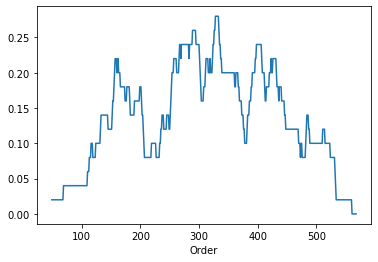

In [77]:
DF2.assign(Inspections=1).reset_index(drop=True).\
    assign(Order=pd.Series(DF2.reset_index(drop=True).index.values)).groupby('Order').\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)['Percent'].rolling(window =50).mean().plot()

In [78]:
DF2[DF2.Verify==1].reset_index(drop=True).iloc[:,:240].to_csv('verifyschools.csv')

In [79]:
DF2['HeaderDD_addnotes'].str.contains('small').sum()

13

In [80]:
#DF.columns[0:20]
#'HeaderDD_addnotes'

In [81]:
DF2['HeaderDD_addnotes'].str.contains('large').sum()

5

In [82]:
DF2[DF2['HeaderDD_addnotes'].isna()==False].\
    assign(b=lambda x:x.HeaderDD_addnotes.str.lower().str.contains('small')*1).\
    query('b==1')['HeaderDD_addnotes'].reset_index(drop=True)[2]

'Add any additional notes.\r\n4 small offices, 1 big classroom all day\r\n460 students, 9-12 grade  '

In [83]:
print(DF2[DF2['REGION'].isin(['SAN JUAN','BAYAMON'])==False]['Verify'].sum()/len(DF2[DF2['REGION'].isin(['SAN JUAN','BAYAMON'])==False]))

0.14184397163120568


In [84]:
print(DF2['Verify'].sum()/len(DF2))

0.12302284710017575


In [85]:
print(DF2[DF2['REGION'].isin(['SAN JUAN','BAYAMON'])==True]['Verify'].sum()/len(DF2[DF2['REGION'].isin(['SAN JUAN','BAYAMON'])==True]))
from scipy.stats import binom
#binom.sf(k=3, n=104, p=0.02752)
print(round(binom.sf(k=7, n=104, p=0.02752),4))

0.0684931506849315
0.0082


In [86]:
print(round(binom.sf(k=10, n=104, p=0.065),4))

0.0754


In [87]:
DF2.assign(Inspections=1).\
    groupby(['REGION']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

,Inspections,Verify,Percent
REGION,,,
ARECIBO,49,0,0.000000
BAYAMON,69,1,0.014493
CAGUAS,62,6,0.096774
HUMACAO,92,13,0.141304
MAYAGUEZ,115,26,0.226087
PONCE,105,15,0.142857
SAN JUAN,77,9,0.116883


In [88]:
DF2.assign(Inspections=1).\
    groupby(['DESIGNATION']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

,Inspections,Verify,Percent
DESIGNATION,,,
Historic,326,41,0.125767
Modern,45,10,0.222222
Old,191,17,0.089005


In [89]:
print(round(binom.sf(k=9, n=127, p=0.039),4))

0.0274


In [90]:
DF2.assign(Inspections=1).\
    groupby(['DISTRICT']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

,Inspections,Verify,Percent
DISTRICT,,,
AGUADILLA,31,8,0.258065
ARECIBO,24,0,0.000000
BAYAMON,41,1,0.024390
CABO ROJO,29,5,0.172414
CAMUY,25,0,0.000000
CANOVANAS,19,2,0.105263
CAROLINA,18,3,0.166667
CIDRA,28,4,0.142857
FAJARDO,20,2,0.100000


In [91]:
DF2.assign(Inspections=1).\
    groupby(['MUNICIPALITY']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

,Inspections,Verify,Percent
MUNICIPALITY,,,
ADJUNTAS,6,2,0.333333
AGUADA,11,2,0.181818
AGUADILLA,11,2,0.181818
AGUAS BUENAS,6,1,0.166667
ARECIBO,17,0,0.000000
AÑASCO,6,3,0.500000
BAYAMON,41,1,0.024390
CABO ROJO,10,0,0.000000
CAGUAS,28,0,0.000000


In [92]:
DF2.assign(Inspections=1).\
    groupby(['GRADES']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

,Inspections,Verify,Percent
GRADES,,,
10 11 12,1,0,0.000000
10 11 12 EES,1,1,1.000000
13 14,4,0,0.000000
2 3 4 5 6 7 8 9 10 11 12,1,0,0.000000
3 4 5 6 7 8 9 10 11 12,1,0,0.000000
3 4 5 6 7 8 9 10 11 12 EEE,1,0,0.000000
4 5 6 7 8,1,0,0.000000
4 5 6 7 8 9 10 11 12,2,1,0.500000
4 5 6 7 8 9 10 11 12 EEE EEI EES,1,1,1.000000


In [93]:
DF2.assign(Inspections=1).\
    groupby(['ZONE']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

,Inspections,Verify,Percent
ZONE,,,
RURAL,226,30,0.132743
URBANA,343,40,0.116618


In [94]:
DF2.assign(Inspections=1).\
    groupby(['REGION','ZONE']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

Inspections  Verify   Percent
REGION   ZONE                                 
ARECIBO  RURAL            29       0  0.000000
         URBANA           20       0  0.000000
BAYAMON  RURAL            20       0  0.000000
         URBANA           49       1  0.020408
CAGUAS   RURAL            20       3  0.150000
         URBANA           42       3  0.071429
HUMACAO  RURAL            43       9  0.209302
         URBANA           49       4  0.081633
MAYAGUEZ RURAL            65      12  0.184615
         URBANA           50      14  0.280000
PONCE    RURAL            40       5  0.125000
         URBANA           65      10  0.153846
SAN JUAN RURAL             9       1  0.111111
         URBANA           68       8  0.117647

In [95]:
DF2.assign(Inspections=1).\
    groupby(['DESIGNATION','ZONE']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

Inspections  Verify   Percent
DESIGNATION ZONE                                 
Historic    RURAL           136      17  0.125000
            URBANA          190      24  0.126316
Modern      RURAL            19       5  0.263158
            URBANA           26       5  0.192308
Old         RURAL            69       7  0.101449
            URBANA          122      10  0.081967

In [96]:
DF2.assign(Inspections=1).\
    groupby(['ZIP CODE (ROI SCHOOL PROFILE_2020 858)']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

,Inspections,Verify,Percent
ZIP CODE (ROI SCHOOL PROFILE_2020 858),,,
000660000,1,0,0.000000
006010000,6,2,0.333333
006020000,11,2,0.181818
006030000,9,1,0.111111
006040000,1,1,1.000000
...,...,...,...
009860000,1,0,0.000000
009870000,1,0,0.000000
009877112,1,0,0.000000


In [97]:
DF2.assign(Inspections=1).\
    groupby(['LEVEL']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

,Inspections,Verify,Percent
LEVEL,,,
PRIMARIO,394,44,0.111675
PS - INSTITUTO,4,0,0.000000
PS - OTROS,2,0,0.000000
SECUNDARIO,100,17,0.170000
TODOS LOS NIVELES,69,9,0.130435


In [98]:
8/(38+25)

0.12698412698412698

In [99]:
38+25

63

In [100]:
from scipy.stats import binom
#binom.sf(k=3, n=104, p=0.02752)
print(round(binom.sf(k=7, n=63, p=0.0405),4))

0.0038


In [101]:
DF2.assign(Inspections=1).\
    groupby(['ZONE','DESIGNATION']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

Inspections  Verify   Percent
ZONE   DESIGNATION                               
RURAL  Historic             136      17  0.125000
       Modern                19       5  0.263158
       Old                   69       7  0.101449
URBANA Historic             190      24  0.126316
       Modern                26       5  0.192308
       Old                  122      10  0.081967

In [102]:
DF2.assign(Inspections=1).\
    groupby(['HeaderDD_ishistorical']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

,Inspections,Verify,Percent
HeaderDD_ishistorical,,,
HISTORICAL,314,39,0.124204
STANDARD,238,29,0.121849


In [103]:
DF2.assign(Inspections=1).\
    groupby(['HeaderDD_bldgtype']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

,Inspections,Verify,Percent
HeaderDD_bldgtype,,,
HIGHER EDUCATION,4,0,0.000000
OTHER/ADULT EDUCATION,70,9,0.128571
PRIMARY,394,44,0.111675
SECONDARY,101,17,0.168317


In [104]:
DF2.assign(Inspections=1).\
    groupby(['HeaderDD_stories']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

,Inspections,Verify,Percent
HeaderDD_stories,,,
MULTI,452,60,0.132743
SINGLE,117,10,0.085470


In [105]:
DF2.assign(Inspections=1).\
    groupby(['HeaderDD_ishistorical','HeaderDD_stories']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

Inspections  Verify   Percent
HeaderDD_ishistorical HeaderDD_stories                               
HISTORICAL            MULTI                     233      31  0.133047
                      SINGLE                     81       8  0.098765
STANDARD              MULTI                     206      27  0.131068
                      SINGLE                     32       2  0.062500

In [106]:
DF2.assign(Inspections=1).\
    groupby(['REGION','HeaderDD_ishistorical','HeaderDD_stories']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

Inspections  Verify   Percent
REGION   HeaderDD_ishistorical HeaderDD_stories                               
ARECIBO  HISTORICAL            MULTI                      19       0  0.000000
                               SINGLE                      8       0  0.000000
         STANDARD              MULTI                      18       0  0.000000
                               SINGLE                      4       0  0.000000
BAYAMON  HISTORICAL            MULTI                      27       1  0.037037
                               SINGLE                      7       0  0.000000
         STANDARD              MULTI                      24       0  0.000000
                               SINGLE                      9       0  0.000000
CAGUAS   HISTORICAL            MULTI                      20       2  0.100000
                               SINGLE                     11       1  0.090909
         STANDARD              MULTI                      21       2  0.095238
                               SINGLE                      7       0  0.000000
HUMACAO  HISTORICAL            MULTI                      33       7  0.212121
                               SINGLE                     14       0  0.000000
         STANDARD              MULTI                      42       6  0.142857
                               SINGLE                      3       0  0.000000
MAYAGUEZ HISTORICAL            MULTI                      58      12  0.206897
                               SINGLE                     12       5  0.416667
         STANDARD              MULTI                      44       8  0.181818
                               SINGLE                      1       1  1.000000
PONCE    HISTORICAL            MULTI                      38       6  0.157895
                               SINGLE                     20       2  0.100000
         STANDARD              MULTI                      41       7  0.170732
                               SINGLE                      5       0  0.000000
SAN JUAN HISTORICAL            MULTI                      38       3  0.078947
                               SINGLE                      9       0  0.000000
         STANDARD              MULTI                      16       4  0.250000
                               SINGLE                      3       1  0.333333

In [107]:
DF2.assign(Inspections=1).\
    groupby(['REGION','LEVEL']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

Inspections  Verify   Percent
REGION   LEVEL                                           
ARECIBO  PRIMARIO                    29       0  0.000000
         PS - OTROS                   1       0  0.000000
         SECUNDARIO                   8       0  0.000000
         TODOS LOS NIVELES           11       0  0.000000
BAYAMON  PRIMARIO                    44       0  0.000000
         PS - INSTITUTO               1       0  0.000000
         SECUNDARIO                  13       1  0.076923
         TODOS LOS NIVELES           11       0  0.000000
CAGUAS   PRIMARIO                    44       4  0.090909
         SECUNDARIO                  10       1  0.100000
         TODOS LOS NIVELES            8       1  0.125000
HUMACAO  PRIMARIO                    63       8  0.126984
         PS - INSTITUTO               1       0  0.000000
         SECUNDARIO                  18       4  0.222222
         TODOS LOS NIVELES           10       1  0.100000
MAYAGUEZ PRIMARIO                    82      16  0.195122
         SECUNDARIO                  23       5  0.217391
         TODOS LOS NIVELES           10       5  0.500000
PONCE    PRIMARIO                    77      10  0.129870
         PS - INSTITUTO               1       0  0.000000
         PS - OTROS                   1       0  0.000000
         SECUNDARIO                  19       5  0.263158
         TODOS LOS NIVELES            7       0  0.000000
SAN JUAN PRIMARIO                    55       6  0.109091
         PS - INSTITUTO               1       0  0.000000
         SECUNDARIO                   9       1  0.111111
         TODOS LOS NIVELES           12       2  0.166667

In [108]:
DF2.assign(Inspections=1).\
    groupby(['ZONE','DESIGNATION','LEVEL']).\
    agg({'Inspections':'sum','Verify':'sum'}).\
    assign(Percent=lambda x:x.Verify/x.Inspections)

Inspections  Verify   Percent
ZONE   DESIGNATION LEVEL                                           
RURAL  Historic    PRIMARIO                   119      15  0.126050
                   PS - OTROS                   1       0  0.000000
                   SECUNDARIO                   4       0  0.000000
                   TODOS LOS NIVELES           12       2  0.166667
       Modern      PRIMARIO                    11       2  0.181818
                   SECUNDARIO                   7       3  0.428571
                   TODOS LOS NIVELES            1       0  0.000000
       Old         PRIMARIO                    38       4  0.105263
                   PS - OTROS                   1       0  0.000000
                   SECUNDARIO                  17       2  0.117647
                   TODOS LOS NIVELES           13       1  0.076923
URBANA Historic    PRIMARIO                   132      13  0.098485
                   PS - INSTITUTO               1       0  0.000000
                   SECUNDARIO                  30       7  0.233333
                   TODOS LOS NIVELES           27       4  0.148148
       Modern      PRIMARIO                    11       1  0.090909
                   PS - INSTITUTO               1       0  0.000000
                   SECUNDARIO                   7       2  0.285714
                   TODOS LOS NIVELES            7       2  0.285714
       Old         PRIMARIO                    79       8  0.101266
                   PS - INSTITUTO               2       0  0.000000
                   SECUNDARIO                  34       2  0.058824
                   TODOS LOS NIVELES            7       0  0.000000

In [109]:
7/8

0.875

In [110]:
DF2[DF2['REGION'].isin(['SAN JUAN','BAYAMON'])==False]['Verify'].sum()/len(DF2[DF2['REGION'].isin(['SAN JUAN','BAYAMON'])==False])

0.14184397163120568

In [111]:
DF2[DF2['REGION'].isin(['SAN JUAN','BAYAMON'])==False]['Verify'].sum()

60

In [112]:
len(DF2[DF2['REGION'].isin(['SAN JUAN','BAYAMON'])==False])

423

In [113]:
DF2[DF2['REGION'].isin(['SAN JUAN','BAYAMON'])==True]['Verify'].sum()/len(DF2[DF2['REGION'].isin(['SAN JUAN','BAYAMON'])==True])

0.0684931506849315

In [114]:
.027*100

2.7

In [115]:
print(DF2[DF2['REGION'].isin(['SAN JUAN','BAYAMON'])==True]['Verify'].sum()/len(DF2[DF2['REGION'].isin(['SAN JUAN','BAYAMON'])==True]))
from scipy.stats import binom
#binom.sf(k=3, n=104, p=0.02752)
print(round(binom.sf(k=7, n=104, p=0.02752),4))

0.0684931506849315
0.0082


In [116]:
0.02752*1.5

0.04128

In [117]:
#binom.sf(k=3, n=104, p=0.02752)
round(binom.sf(k=5, n=104, p=0.02752),4)

0.0679

In [118]:
10

10

In [119]:
DF[DF['Combo'].str.lower().str.contains('|'.join(['verify']))]

,Unnamed: 0,Header_schoolid,Header_schoolname,Header_yearbuilt,Header_enrolment,HeaderDD_isshelter,Header_bldgsqft,Header_asssqft,Header_numstories,Header_assessdate,...,EXST_CAMPUS_ACCESS_NOTE,EXST_OP_WALLS_NOTE,EXST_STORAGE_NOTE,EXST_CLASSRM_SINK_NOTE,EXST_WRTBL_SURFACE_NOTE,EXST_CAMPUS_LAYOUT_NOTE,EXST_ADMIN_NOTE,Combo,Combo2,School Code
44,15396_FCI_BI_MATEO HERNANDEZ.pdf,15396,MATEO HERNANDEZ,1926.0,200.0,NaN,62828.0,20K ish,2,3/24/2022,...,Main entrance access is by steps only. High s...,additional notes,"Storage building 10 x 40, and under stairs. ...",additional notes,One large marker board per classroom.,"1 and 2 story bars, dead ends at upper levels.","Secretary, social worker, health office, auxil...",one separate small storage building has quite ...,one separate small storage building has quite ...,15396
68,20172_FCI_BI_SU BAYAMONCITO.pdf,20172,SU BAYAMONCITO,1929.0,264.0,NaN,38702.0,Enter Sq. Ft.,1,03/09/2022,...,"Schools on sloped site, very natural but does ...","No operable, but infill so module could be mod...","For school, minimal for classrooms (cabinets),...","Kinder, sped and science",White boards,Signage would help,They are using office plus standard classroom,k-8 \r\nabout 2 classroom for autism about 9 ...,k-8 \r\nabout 2 classroom for autism about 9 ...,20172
106,30841_FCI_BI_CARMEN BENITEZ.pdf,30841,CARMEN BENITEZ,1955.0,340.0,NaN,36500.0,Enter Sq. Ft.,1,03/09/2022,...,additional notes,additional notes,additional notes,additional notes,additional notes,additional notes,Only one office for director in admin,368 students \r\n\r\nverify square footage 100...,368 students \r\n\r\nverify square footage @@ ...,30841
107,30874_FCI_BI_JOSE DE DIEGO.pdf,30874,JOSE DE DIEGO,1946.0,238.0,PRIMARY,3600.0,Enter Sq. Ft.,2,03/09/2022,...,additional notes,additional notes,No storage at all,additional notes,additional notes,Individual buildings,admin has 4 office and a kitchenette,verify square footage\r\n\r\n232 kids total.\r...,verify square footage\r\n\r\n232 kids total.\r...,30874
109,30924_FCI_BI_LUIS MUÑOZ RIVERA.pdf,30924,LUIS MUÑOZ RIVERA,1929.0,225.0,PRIMARY,13878.0,Enter Sq. Ft.,2,03/09/2022,...,additional notes,additional notes,additional notes,additional notes,additional notes,Spread out buildings,One office only for director,verify square footage 100% of the built enviro...,verify square footage @@ 100% of the built env...,30924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,55483-FCI-ANGELA CORDERO BERNARD.pdf,55483,ANGELA CORDERO BERNARD,1980.0,511.0,PRIMARY,12108.0,Enter Sq. Ft.,2,2/16/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"435 students, no full time sped, but resource ...","435 students, no full time sped, but resource ...",55483
453,58099-FCI-PROFESORA LUIZA MONSEGUR VELEZ.pdf,58099,PROFESORA LUIZA MONSEGUR VELEZ,1946.0,235.0,NaN,26314.0,Enter Sq. Ft.,2,2/14/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"246 students, of which 64 sped 2004 school r...","246 students, of which 64 sped 2004 school r...",58099
457,60038-FCI-JULIAN E BLANCO (BALLET).pdf,60038,JULIAN E BLANCO (BALLET),1919.0,94.0,NaN,19376.0,Enter Sq. Ft.,2,2/18/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,verify square footage 80% of the built environ...,verify square footage @@ 80% of the built envi...,60038
466,61747-FCI-PADRE RUFO (BILINGÜE).pdf,61747,PADRE RUFO (BILINGÜE),1900.0,305.0,NaN,3420.0,Enter Sq. Ft.,"3 story classrooms, 1 story kitchen",2/18/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,verify square footage 100% of the built enviro...,verify square footage @@ 100% of the built env...,61747


In [120]:
NotOpenDF=DF[['Unnamed: 0','Header_schoolname','HeaderDD_addnotes','Combo']].\
    assign(NotOpen=lambda x:x.Combo.str.lower().str.contains('|'.join(['vacant','no students','abandon','out of use','unused',
                                                           'closed school',' closed',
                                                           'close school','close class','gym close',
                                                           'close build','building close','closed building',
                                                           'closed class','school closed','not being used',
                                                           'relocate']))*1)

In [121]:
VerfiyFrame=DF[['Unnamed: 0','Header_schoolname','HeaderDD_addnotes','Combo']].\
    assign(Verify=lambda x:x.Combo.str.lower().str.contains('|'.join(['verif']))*1)

In [122]:
DF['Combo'].str.lower().str.contains('|'.join(['short column','damage column',
                                                                          'damaged column',
                                                                          'columns need',
                                                                          'cracked column',
                                                                          'column need',
                                                                           'spalling column',
                                                                          'columns crack'])).sum()

87

In [142]:
DF['Columns Need Repair']=DF['Combo'].str.lower().str.contains('|'.join(['short column',
                                                                          'damage column',
                                                                          'damaged column',
                                                                          'columns need',
                                                                          'cracked column',
                                                                          'column need',
                                                                          'columns crack']))*1

DF['Air Conditioner']=DF['Combo'].str.lower().str.contains('|'.join(['air cond']))*1

DF['Paint']=DF['Combo'].str.lower().str.contains('|'.join(['paint']))*1
DF['Leak']=DF['Combo'].str.lower().str.contains('|'.join(['leak']))*1
DF['Roof']=DF['Combo'].str.lower().str.contains('|'.join(['roof']))*1
DF['Ceiling']=DF['Combo'].str.lower().str.contains('|'.join(['ceiling']))*1
DF['Fungus Mold']=DF['Combo'].str.lower().str.contains('|'.join(['fungus','fungal','mold','rott']))*1
DF['Electric']=DF['Combo'].str.lower().str.contains('|'.join(['electric']))*1
DF['Plumbing']=DF['Combo'].str.lower().str.contains('|'.join(['sink','plumb','toilet']))*1
DF['Fence']=DF['Combo'].str.lower().str.contains('|'.join(['fence']))*1
DF['Gate']=DF['Combo'].str.lower().str.contains('|'.join(['gate']))*1
DF['Pests']=DF['Combo'].str.lower().str.contains('|'.join(['insect','bug','roach','termite','mice','mouse','rats','pest',
                                                'pigeon','centipede','mosquito','comejen','dogs','cats','animal','moth','rodent',
                                                'horses','cows','nesting']))*1

<AxesSubplot:>

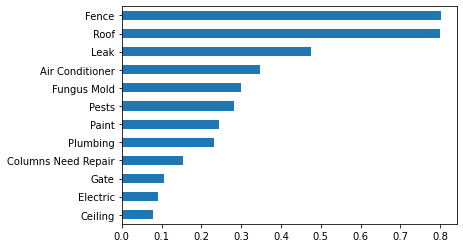

In [151]:
(DF[['Columns Need Repair','Air Conditioner',
    'Paint','Leak','Roof','Ceiling','Fungus Mold',
    'Electric','Plumbing','Fence','Gate','Pests']].sum()/len(DF)).sort_values().plot(kind='barh')

In [187]:
DF2.groupby('REGION')['FCI_PERCENTAGE'].agg(['median','mad'])

,median,mad
REGION,,
ARECIBO,0.83500,0.310145
BAYAMON,0.93750,0.321952
CAGUAS,0.89625,0.370356
HUMACAO,0.77375,0.269697
MAYAGUEZ,1.09280,0.286872
PONCE,1.04400,0.330879
SAN JUAN,1.11200,0.405829


In [ ]:
DF2

In [209]:
DF2['FCI100']=(DF2['FCI_PERCENTAGE']>=1)*1

In [219]:
DF2

,Unnamed: 0,Header_schoolid,Header_schoolname,Header_yearbuilt,Header_enrolment,HeaderDD_isshelter,Header_bldgsqft,Header_asssqft,Header_numstories,Header_assessdate,...,PRDE Building SF.Building #17,PRDE Building SF.Building #18,PRDE Building SF.Building #19,PRDE Building SF.Building #20,PRDE Building SF.ADDITIONAL SF - NO BLDG SPECIFIED,PRDE Building SF.Campus Total Square Feet,PRDE Building SF.2021-22 ENROLLMENT/ CLOSED,PRDE Building SF.2021-22 Enrollment Update 02/1/22,Verify,FCI100
10173,10173_FCI_BI_COTTO (ANEXO).pdf,10173,COTTO (ANEXO),1942.0,31.0,NaN,13037.0,Enter Sq. Ft.,1,3/29/2022,...,NaN,NaN,NaN,NaN,NaN,13037.0,31,228.0,0,0
10314,10314_FCI_BI_JULIO SEIJO.pdf,10314,JULIO SEIJO,1930.0,175.0,PRIMARY,20393.0,Enter Sq. Ft.,1,03/25/2022,...,NaN,NaN,NaN,NaN,NaN,20393.0,175,483.0,0,1
10322,10322_FCI_BI_SU ENRIQUE DE JESUS BORRAS.pdf,10322,SU ENRIQUE DE JESUS BORRAS,1948.0,214.0,PRIMARY,41731.0,Enter Sq. Ft.,2,3/30/2022,...,NaN,NaN,NaN,NaN,NaN,41731.0,214,460.0,0,1
10355,10355_FCI_BI_JOHN W HARRIS.pdf,10355,JOHN W HARRIS,1946.0,231.0,NaN,65455.0,Enter Sq. Ft.,2,3/29/2022,...,NaN,NaN,NaN,NaN,NaN,65455.0,231,180.0,0,0
10439,10439_FCI_BI_DR CAYETANO COLL Y TOSTE.pdf,10439,DR CAYETANO COLL Y TOSTE,1950.0,547.0,PRIMARY,110436.0,Enter Sq. Ft.,3,3/30/2022,...,NaN,NaN,NaN,NaN,NaN,110436.0,547,554.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78253,78253-FCI-NUEVA ELEMENTAL URBANA DE GUAYNABO.pdf,78253,NUEVA ELEMENTAL URBANA DE GUAYNABO,1995.0,380.0,NaN,85660.0,Enter Sq. Ft.,1,3/3/2022,...,NaN,NaN,NaN,NaN,NaN,85660.0,380,NaN,0,0
78733,78733-FCI-FRANCISCO GAZTAMBIDE VEGA (1).pdf,78733,FRANCISCO GAZTAMBIDE VEGA,1997.0,443.0,NaN,46142.0,Enter Sq. Ft.,2,2/10/2022,...,NaN,NaN,NaN,NaN,NaN,46142.0,443,NaN,0,0
78733,78733-FCI-FRANCISCO GAZTAMBIDE VEGA.pdf,78733,FRANCISCO GAZTAMBIDE VEGA,1997.0,443.0,NaN,46142.0,Enter Sq. Ft.,2,2/10/2022,...,NaN,NaN,NaN,NaN,NaN,46142.0,443,NaN,0,0
78832,78832-FCI-MARTIN GARCIA GIUSTI.pdf,78832,MARTIN GARCIA GIUSTI,1995.0,352.0,PRIMARY,53089.0,Enter Sq. Ft.,2,2/11/2022,...,NaN,NaN,NaN,NaN,NaN,53089.0,352,NaN,0,0


In [229]:
DF2.assign(dummy=1).groupby('HeaderDD_stories').agg({'FCI100':'sum','dummy':'sum'}).assign()

,FCI100,dummy
HeaderDD_stories,,
MULTI,198,452
SINGLE,65,117


In [230]:
198/452

0.43805309734513276

In [231]:
65/117

0.5555555555555556

In [226]:
HeaderDD_stories

NameError: name 'HeaderDD_stories' is not defined

In [224]:
DF2.columns.to_list()

['Unnamed: 0',
 'Header_schoolid',
 'Header_schoolname',
 'Header_yearbuilt',
 'Header_enrolment',
 'HeaderDD_isshelter',
 'Header_bldgsqft',
 'Header_asssqft',
 'Header_numstories',
 'Header_assessdate',
 'Header_assessorname',
 'Header_buildingnums',
 'HeaderDD_bldgtype',
 'HeaderDD_stories',
 'Header_classrooms',
 'Header_region',
 'HeaderDD_site',
 'HeaderDD_ishistorical',
 'HeaderDD_addnotes',
 'Header_HardCost',
 'Header_SoftCost',
 'Header_Total',
 'Multiplier_bldgtype',
 'Multiplier_stories',
 'Multiplier_historical',
 'Multiplier_site',
 'Multiplier',
 'GENINFO_primary',
 'GENINFO_allstr',
 'GENINFO_Onsiteparking',
 'GENINFO_Campusaccess',
 'GENINFO_existingbldgstock',
 'GENINFO_utilitieselec',
 'GENINFO_utilitiesinternet',
 'GENINFO_openspace',
 'GENINFO_conditexistbldg',
 'GENINFO_other',
 'GENINFO_sitedrain',
 'SITE_frontage',
 'SITE_drives',
 'SITE_parking',
 'SITE_loading',
 'SITE_drainage',
 'SITE_walkways',
 'SITE_extlight',
 'SITE_fencing',
 'SITE_playgrs',
 'SITE_sign

In [206]:
sum(DF2['FCI_PERCENTAGE']>=1)/len(DF2)

0.46221441124780316

In [205]:
sum(DF2['FCI_PERCENTAGE']>=1)

263

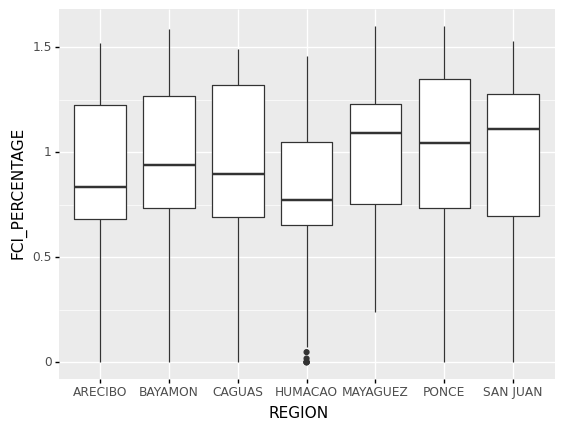

<ggplot: (-9223371857657150996)>

In [201]:
(ggplot(DF2,aes(x='REGION',y='FCI_PERCENTAGE'))+geom_boxplot())

<AxesSubplot:title={'center':'FCI_PERCENTAGE'}, xlabel='REGION'>

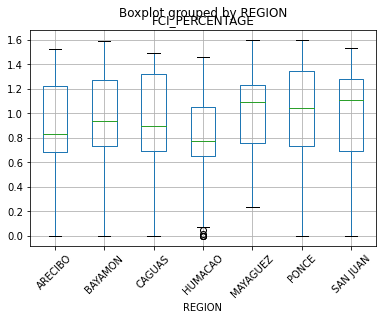

In [196]:
DF2.boxplot(column='FCI_PERCENTAGE',by='REGION',rot=45)

REGION
ARECIBO     AxesSubplot(0.125,0.125;0.775x0.755)
BAYAMON     AxesSubplot(0.125,0.125;0.775x0.755)
CAGUAS      AxesSubplot(0.125,0.125;0.775x0.755)
HUMACAO     AxesSubplot(0.125,0.125;0.775x0.755)
MAYAGUEZ    AxesSubplot(0.125,0.125;0.775x0.755)
PONCE       AxesSubplot(0.125,0.125;0.775x0.755)
SAN JUAN    AxesSubplot(0.125,0.125;0.775x0.755)
Name: FCI_PERCENTAGE, dtype: object

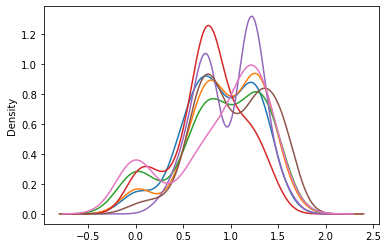

In [171]:
DF2.groupby('REGION')['FCI_PERCENTAGE'].plot(kind='kde')

In [172]:
from plotnine import*

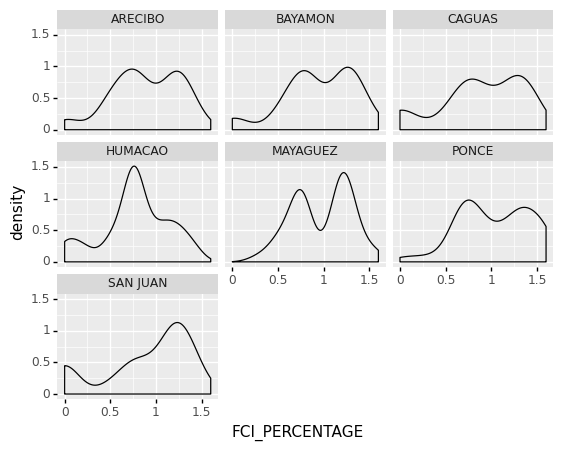

<ggplot: (-9223371857665951560)>

In [183]:
(ggplot(DF2,aes(x='FCI_PERCENTAGE'))+geom_density(color='black')+facet_wrap('REGION'))

C:\Users\dmckenzie\AppData\Roaming\Python\Python37\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 13'. Pick better value with 'binwidth'.
C:\Users\dmckenzie\AppData\Roaming\Python\Python37\site-packages\plotnine\facets\facet.py:393: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
C:\Users\dmckenzie\AppData\Roaming\Python\Python37\site-packages\plotnine\facets\facet.py:399: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


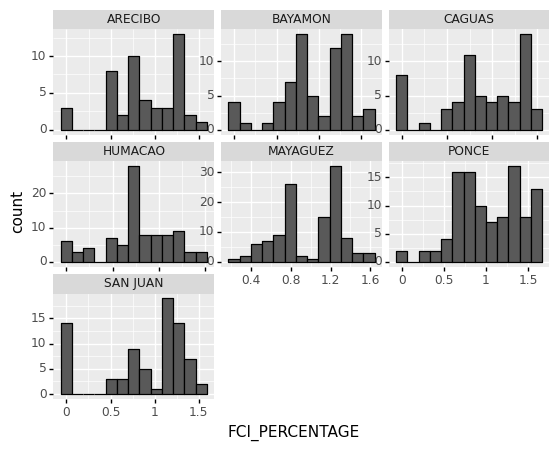

<ggplot: (-9223371857669645104)>

In [181]:
(ggplot(DF2,aes(x='FCI_PERCENTAGE'))+geom_histogram(color='black')+facet_wrap('REGION',scales='free'))

<AxesSubplot:>

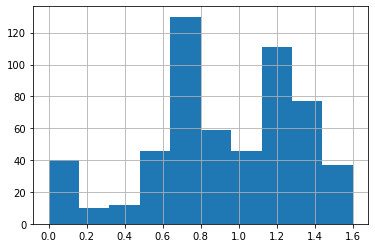

In [165]:
DF['FCI_PERCENTAGE'].hist()

In [161]:
DF.columns.to_list()[:]

['Unnamed: 0',
 'Header_schoolid',
 'Header_schoolname',
 'Header_yearbuilt',
 'Header_enrolment',
 'HeaderDD_isshelter',
 'Header_bldgsqft',
 'Header_asssqft',
 'Header_numstories',
 'Header_assessdate',
 'Header_assessorname',
 'Header_buildingnums',
 'HeaderDD_bldgtype',
 'HeaderDD_stories',
 'Header_classrooms',
 'Header_region',
 'HeaderDD_site',
 'HeaderDD_ishistorical',
 'HeaderDD_addnotes',
 'Header_HardCost',
 'Header_SoftCost',
 'Header_Total',
 'Multiplier_bldgtype',
 'Multiplier_stories',
 'Multiplier_historical',
 'Multiplier_site',
 'Multiplier',
 'GENINFO_primary',
 'GENINFO_allstr',
 'GENINFO_Onsiteparking',
 'GENINFO_Campusaccess',
 'GENINFO_existingbldgstock',
 'GENINFO_utilitieselec',
 'GENINFO_utilitiesinternet',
 'GENINFO_openspace',
 'GENINFO_conditexistbldg',
 'GENINFO_other',
 'GENINFO_sitedrain',
 'SITE_frontage',
 'SITE_drives',
 'SITE_parking',
 'SITE_loading',
 'SITE_drainage',
 'SITE_walkways',
 'SITE_extlight',
 'SITE_fencing',
 'SITE_playgrs',
 'SITE_sign

In [124]:
DF[['Unnamed: 0','Header_schoolname','HeaderDD_addnotes','Combo']].\
    assign(NotOpen=lambda x:x.Combo.str.lower().str.contains('|'.join(['vacant','no students','abandon','out of use','unused',
                                                           'closed school',' closed',
                                                           'close school','close class','gym close',
                                                           'close build','building close','closed building',
                                                           'closed class','school closed','not being used',
                                                           'relocate']))*1).\
    assign(Verify=lambda x:x.Combo.str.lower().str.contains('|'.join(['verif']))*1)

,Unnamed: 0,Header_schoolname,HeaderDD_addnotes,Combo,NotOpen,Verify
0,10173_FCI_BI_COTTO (ANEXO).pdf,COTTO (ANEXO),"SPED-only building, 5 to 22 years old, seven d...","sped-only building, 5 to 22 years old, seven d...",1,0
1,10314_FCI_BI_JULIO SEIJO.pdf,JULIO SEIJO,Add any additional notes.,60% of the built environment on campus is in ...,0,0
2,10322_FCI_BI_SU ENRIQUE DE JESUS BORRAS.pdf,SU ENRIQUE DE JESUS BORRAS,"K-8\r\nAutism, therapy \r\nRefuge area","k-8\r\nautism, therapy \r\nrefuge area 100% o...",0,0
3,10355_FCI_BI_JOHN W HARRIS.pdf,JOHN W HARRIS,Wall tie-in to column work done.\r\nPk - 5.\r\...,wall tie-in to column work done.\r\npk - 5.\r\...,1,0
4,10439_FCI_BI_DR CAYETANO COLL Y TOSTE.pdf,DR CAYETANO COLL Y TOSTE,K- 8.\r\nActually built in 2011 - new!,k- 8.\r\nactually built in 2011 - new! 100% of...,0,0
...,...,...,...,...,...,...
563,78253-FCI-NUEVA ELEMENTAL URBANA DE GUAYNABO.pdf,NUEVA ELEMENTAL URBANA DE GUAYNABO,Theater closed since Maria. \r\nCentral ac not...,theater closed since maria. \r\ncentral ac not...,1,0
564,78733-FCI-FRANCISCO GAZTAMBIDE VEGA (1).pdf,FRANCISCO GAZTAMBIDE VEGA,166 sped students Arts and science classes,166 sped students arts and science classes 10...,0,0
565,78733-FCI-FRANCISCO GAZTAMBIDE VEGA.pdf,FRANCISCO GAZTAMBIDE VEGA,166 sped students Arts and science classes,166 sped students arts and science classes 10...,0,0
566,78832-FCI-MARTIN GARCIA GIUSTI.pdf,MARTIN GARCIA GIUSTI,"338 students, 26 teachers, 17 staff. (15 sped ...","338 students, 26 teachers, 17 staff. (15 sped ...",0,0


In [125]:
#VerfiyFrame.to_csv('VerfiyFrame.csv')

In [126]:
#NotOpenDF.to_csv('AbandonFrame.csv')

In [127]:
len(DF[DF['Combo'].str.lower().str.contains('|'.join(['vacant','no students','abandon','out of use','unused',
                                                           'closed school',' closed',
                                                           'close school','close class','gym close',
                                                           'close build','building close','closed building',
                                                           'closed class','school closed','not being used',
                                                           'relocate']))])/len(DF)

0.2482394366197183

In [128]:
len(DF[(DF['Combo'].str.lower().str.contains('|'.join(['vacant','no students','abandon','out of use','unused',
                                                           ' closed','school closed','closed school',
                                                           'close school','close class','gym close',
                                                           'close build','building close','closed building',
                                                           'closed class','school closed','not being used',
                                                           'relocate'])))])/len(DF)



0.2482394366197183

In [544]:
DF['Combo'].str.lower().str.contains('|'.join(['vacant','no students','abandon','out of use','unused',
                                                           'closed school','',
                                                           'close school','close class','gym close',
                                                           'close build','building close','closed building',
                                                           'closed class','school closed','not being used',
                                                           'relocate'])).sum()

213

In [546]:
print('% of FCI records containing given substring(s), i.e. leak gets records containg leak as well as leaking and leaky\n')

print('Percent "closed, vacant, no students, or abandonded":','%',
      round(len(DFCV) /len(DF),2)*100)

print('Percent "vacant, no students, or abandonded":','%',
      round(DF['Combo'].str.lower().str.contains('|'.join(['vacant','no students','abandon','out of use','unused',
                                                           'closed school','school closed','not being used','reloca'])).sum() /len(DF),2)*100)

print('Percent "damage, corrosion, deterioration, earthquake, or hurricane":','%',
      round(DF['Combo'].str.lower().str.contains('|'.join(['damage','corrosion','deterioration','earthquake','hurricane'])).sum()/len(DF),2)*100)

print('Percent "earthquake":','%',
      round(DF['Combo'].str.lower().str.contains('|'.join(['earthquake'])).sum()/len(DF),2)*100)
print('Percent "Insect, termite, or infest":','%',
      round(DF['Combo'].str.lower().str.contains('|'.join(['termite','insect','infest'])).sum()/len(DF),2)*100)
print('Percent "mold", "microb":','%',
      round(DF['Combo'].str.lower().str.contains('|'.join(['mold','microb'])).sum()/len(DF),2)*100)
print('Percent "non-hygienic":','%',
      round(DF['Combo'].str.lower().str.contains('|'.join(['non-hygienic'])).sum()/len(DF),2)*100)

print('Percent "mold":','%',
      round(DF['Combo'].str.lower().str.contains('|'.join(['mold'])).sum()/len(DF),2)*100)
print('Percent "microb":','%',
      round(DF['Combo'].str.lower().str.contains('|'.join(['microb'])).sum()/len(DF),2)*100)

print('Percent "damage":','%',
      round(DF['Combo'].str.lower().str.contains('|'.join(['damage'])).sum()/len(DF),2)*100)

print('Percent "overgrown":','%',
      round(DF['Combo'].str.lower().str.contains('|'.join(['overgrown'])).sum()/len(DF),2)*100)

print('Percent "leak":','%',
      round(DF['Combo'].str.lower().str.contains('|'.join(['leak'])).sum()/len(DF),2)*100)

print('Percent "verify":','%',
      round(DF['Combo'].str.lower().str.contains('|'.join(['verify'])).sum()/len(DF),2)*100)

% of FCI records containing given substring(s), i.e. leak gets records containg leak as well as leaking and leaky

Percent "closed, vacant, no students, or abandonded": % 20.0
Percent "vacant, no students, or abandonded": % 19.0
Percent "damage, corrosion, deterioration, earthquake, or hurricane": % 94.0
Percent "earthquake": % 6.0
Percent "Insect, termite, or infest": % 16.0
Percent "mold", "microb": % 44.0
Percent "non-hygienic": % 27.0
Percent "mold": % 30.0
Percent "microb": % 15.0
Percent "damage": % 36.0
Percent "overgrown": % 3.0
Percent "leak": % 44.0
Percent "verify": % 7.000000000000001


In [956]:
print('% of FCI records FOR CLOSED SCHOOLS containing given substring(s), i.e. leak gets records containg leak as well as leaking and leaky\n')



print('Percent "damage, corrosion, deterioration, earthquake, or hurricane":','%',
      round(DFCV['Combo'].str.lower().str.contains('|'.join(['damage','corrosion','deterioration','earthquake','hurricane'])).sum()/len(DFCV),2)*100)

print('Percent "earthquake":','%',
      round(DFCV['Combo'].str.lower().str.contains('|'.join(['earthquake'])).sum()/len(DFCV),2)*100)
print('Percent "Insect, termite, or infest":','%',
      round(DFCV['Combo'].str.lower().str.contains('|'.join(['termite','insect','infest'])).sum()/len(DFCV),2)*100)

print('Percent "non-hygienic":','%',
      round(DFCV['Combo'].str.lower().str.contains('|'.join(['non-hygienic'])).sum()/len(DFCV),2)*100)

print('Percent "mold", "microb":','%',
      round(DFCV['Combo'].str.lower().str.contains('|'.join(['mold','microb'])).sum()/len(DFCV),2)*100)

print('Percent "mold":','%',
      round(DFCV['Combo'].str.lower().str.contains('|'.join(['mold'])).sum()/len(DFCV),2)*100)
print('Percent "microb":','%',
      round(DFCV['Combo'].str.lower().str.contains('|'.join(['microb'])).sum()/len(DFCV),2)*100)

print('Percent "damage":','%',
      round(DFCV['Combo'].str.lower().str.contains('|'.join(['damage'])).sum()/len(DFCV),2)*100)

print('Percent "overgrown":','%',
      round(DFCV['Combo'].str.lower().str.contains('|'.join(['overgrown'])).sum()/len(DFCV),2)*100)

print('Percent "leak":','%',
      round(DFCV['Combo'].str.lower().str.contains('|'.join(['leak'])).sum()/len(DFCV),2)*100)

print('Percent "verify":','%',
      round(DFCV['Combo'].str.lower().str.contains('|'.join(['verify'])).sum()/len(DFCV),2)*100)

% of FCI records FOR CLOSED SCHOOLS containing given substring(s), i.e. leak gets records containg leak as well as leaking and leaky

Percent "damage, corrosion, deterioration, earthquake, or hurricane": % 100.0
Percent "earthquake": % 23.0
Percent "Insect, termite, or infest": % 19.0
Percent "non-hygienic": % 42.0
Percent "mold", "microb": % 31.0
Percent "mold": % 15.0
Percent "microb": % 15.0
Percent "damage": % 46.0
Percent "overgrown": % 15.0
Percent "leak": % 23.0
Percent "verify": % 8.0


In [ ]:
""

In [ ]:
corrosion
deterioration
deterioration
slab
water
framing
park
site
deterioration
stable
fence
rain
glass
joist
walkway
hall
building
transformer
extenstively
foundation
poor
kitchen
compl
clearance
exhaust
sidewalk
flood
rut
library
admin
strormwater
storm
stain
grout
classroom
finishes
ceramic,
drain
vent
classes
trash
microb
basin
clog
plaster 
problem
restrict

In [874]:
model.wv.most_similar('closed',topn=20)

[('vacant', 0.9984464645385742),
 ('single', 0.9983470439910889),
 ('very', 0.9979905486106873),
 ('time', 0.9979318380355835),
 ('culvert', 0.9979290962219238),
 ('3', 0.9978824853897095),
 ('multi', 0.9978316426277161),
 ('years', 0.997663676738739),
 ('adjacent', 0.997488260269165),
 ('open', 0.9974237680435181),
 ('this', 0.997373104095459),
 ('school', 0.9972463846206665),
 ('full', 0.997218132019043),
 ('that', 0.9972109198570251),
 ('being', 0.9971528053283691),
 ('into', 0.9970641136169434),
 ('court', 0.9970302581787109),
 ('wing', 0.9969412088394165),
 ('low', 0.9967402219772339),
 ('etc', 0.9966639280319214)]

In [133]:
model.wv.most_similar('reliable',topn=20)

[('secured', 0.6214115619659424),
 ('rains', 0.5938302278518677),
 ('25x26', 0.5841768383979797),
 ('wi/fi', 0.559668779373169),
 ('supposed', 0.5586526393890381),
 ('therefore', 0.5444087982177734),
 ('set', 0.5287477970123291),
 ('75', 0.5051823854446411),
 ('walked', 0.5036762356758118),
 ('controlled', 0.48392945528030396),
 ('stud', 0.48054951429367065),
 ('amount', 0.46759065985679626),
 ('garage', 0.46383580565452576),
 ('angle', 0.45493894815444946),
 ('sure', 0.4514041841030121),
 ('85', 0.45122063159942627),
 ('materials', 0.450867623090744),
 ('communication', 0.41789814829826355),
 ('1600', 0.3982984721660614),
 ('step', 0.39286908507347107)]

In [875]:
model.wv.most_similar('vacant',topn=20)

[('school', 0.9985523223876953),
 ('years', 0.998549222946167),
 ('closed', 0.9984464645385742),
 ('single', 0.997694730758667),
 ('time', 0.9976856708526611),
 ('being', 0.9975687861442566),
 ('this', 0.997543215751648),
 ('very', 0.9971534609794617),
 ('that', 0.9969615936279297),
 ('full', 0.9968323707580566),
 ('adjacent', 0.9967669248580933),
 ('culvert', 0.9967451095581055),
 ('multi', 0.9965088963508606),
 ('back', 0.9964599609375),
 ('open', 0.996457576751709),
 ('3', 0.9963592290878296),
 ('etc', 0.9962300062179565),
 ('into', 0.996192455291748),
 ('as', 0.996187686920166),
 ('was', 0.9960901737213135)]

In [898]:
model.wv.most_similar('structural',topn=20)
model.wv.most_similar('structure',topn=20)

[('walls', 0.9976547956466675),
 ('have', 0.9970650672912598),
 ('cracking', 0.9955705404281616),
 ('visible', 0.9946668148040771),
 ('significant', 0.993838369846344),
 ('spalling', 0.992339551448822),
 ('minor', 0.9850869178771973),
 ('corrosion', 0.9843615889549255),
 ('members', 0.9827815294265747),
 ('most', 0.9824970960617065),
 ('some', 0.9821774959564209),
 ('framing', 0.9808660745620728),
 ('exposed', 0.9792896509170532),
 ('reinforcing', 0.9780722856521606),
 (',', 0.97748863697052),
 ('or', 0.9763837456703186),
 ('roof', 0.9737738370895386),
 ('deterioration', 0.972415566444397),
 ('wood', 0.97066330909729),
 ('decking', 0.9702321887016296)]

[('gym', 0.9968029260635376),
 ('wet', 0.9965795278549194),
 ('under', 0.996250331401825),
 ('problems', 0.9955042004585266),
 ('above', 0.9953635931015015),
 ('separate', 0.9952075481414795),
 ('inner', 0.9950345754623413),
 ('replacement', 0.9949862360954285),
 ('see', 0.9946222901344299),
 ('when', 0.9945236444473267),
 ('unobserved', 0.99431973695755),
 ('insect', 0.9942952394485474),
 ('rooms', 0.9939860105514526),
 ('damage', 0.993968665599823),
 ('second', 0.9939508438110352),
 ('2nd', 0.9939481019973755),
 ('looked', 0.9937022924423218),
 ('slippery', 0.993584156036377),
 ('joint', 0.9935676455497742),
 ('courtyard', 0.9933751225471497)]

In [902]:
model.wv.most_similar('damage',topn=20)
model.wv.most_similar('damaged',topn=20)

[('rooms', 0.9967543482780457),
 ('problem', 0.9966869354248047),
 ('microbial', 0.9960678219795227),
 ('replacement', 0.9953156113624573),
 ('classroom', 0.9951549768447876),
 ('stairs', 0.9950206279754639),
 ('half', 0.9948715567588806),
 ('under', 0.9947774410247803),
 ('doesn', 0.994252622127533),
 ('metal', 0.9940145015716553),
 ('termite', 0.994001030921936),
 ('slippery', 0.9939879179000854),
 ('structure', 0.993968665599823),
 ('apparent', 0.9939640760421753),
 ('finish', 0.9939188957214355),
 ('corridors', 0.993861198425293),
 ('gym', 0.9936512112617493),
 ('due', 0.9935466647148132),
 ('spaces', 0.9935159683227539),
 ('room', 0.993415892124176)]

[('construction', 0.9980651140213013),
 ('they', 0.997952938079834),
 ('dining', 0.9979053735733032),
 ('cafeteria', 0.9977978467941284),
 ('upper', 0.9977926015853882),
 ('3-phase', 0.9977357387542725),
 ('kinder', 0.9976491332054138),
 ('infestation', 0.9975895285606384),
 ('locked', 0.99747633934021),
 ('as', 0.9974546432495117),
 ('was', 0.9974300861358643),
 ('inside', 0.9973958134651184),
 ('repairs', 0.9972643852233887),
 ('had', 0.9971326589584351),
 ('treads', 0.9970412254333496),
 ('25', 0.9970200061798096),
 ('about', 0.9969971179962158),
 ('area', 0.9969963431358337),
 ('spaces', 0.9969043731689453),
 ('mount', 0.9968521595001221)]

In [903]:
model.wv.most_similar('infestation',topn=20)


[('inside', 0.9979034662246704),
 ('damaged', 0.9975895285606384),
 ('construction', 0.9972640872001648),
 ('lower', 0.9970974922180176),
 ('dining', 0.9970071911811829),
 ('mount', 0.9970061779022217),
 ('repairs', 0.9969421625137329),
 ('cafeteria', 0.9969377517700195),
 ('as', 0.996902346611023),
 ('central', 0.996887743473053),
 ('they', 0.9968748092651367),
 ('there', 0.9968281388282776),
 ('upper', 0.9968252182006836),
 ('used', 0.9967453479766846),
 ('overall', 0.9965106248855591),
 ('kinder', 0.9964441061019897),
 ('25', 0.9963613748550415),
 ('thru', 0.9963464736938477),
 ('restroom', 0.9963353872299194),
 ('was', 0.99631267786026)]

In [ ]:
'restroom'
'bathroom'

In [914]:
model.wv.most_similar(['wet','slippery'],topn=20)

[('when', 0.9990981221199036),
 ('replacement', 0.9978461265563965),
 ('gym', 0.9973435997962952),
 ('under', 0.9969720840454102),
 ('microbial', 0.996829628944397),
 ('unobserved', 0.9966788291931152),
 ('stairs', 0.9966351985931396),
 ('second', 0.9965245723724365),
 ('partitions', 0.9964068531990051),
 ('growth', 0.9962700605392456),
 ('separate', 0.9962037801742554),
 ('structure', 0.9961925148963928),
 ('doors', 0.9961022138595581),
 ('insect', 0.99602210521698),
 ('off', 0.9956741333007812),
 ('doesn', 0.9956653714179993),
 ('joint', 0.9955258369445801),
 ('rooms', 0.9954067468643188),
 ('half', 0.9953928589820862),
 ('major', 0.9953597187995911)]

In [916]:
model.wv.most_similar(['insect','termite','infestation'],topn=20)

[('stairs', 0.9985669255256653),
 ('microbial', 0.9984583258628845),
 ('spaces', 0.9978572130203247),
 ('mostly', 0.9977465867996216),
 ('growth', 0.9977236986160278),
 ('one', 0.9977192878723145),
 ('rooms', 0.997367262840271),
 ('metal', 0.9972183108329773),
 ('replacement', 0.9971408843994141),
 ('construction', 0.9970669150352478),
 ('treads', 0.9970445036888123),
 ('storage', 0.9970075488090515),
 ('was', 0.9969213008880615),
 ('damaged', 0.9968767166137695),
 ('verify', 0.9968721866607666),
 ('fci', 0.9968162775039673),
 ('half', 0.996711015701294),
 ('major', 0.9966942071914673),
 ('t', 0.9966779947280884),
 ('doesn', 0.9966150522232056)]

In [901]:
dining
cafeteria
cafeteria
model.wv.most_similar('wet',topn=20)
model.wv.most_similar('slippery',topn=20)
model.wv.most_similar('insect',topn=20)
model.wv.most_similar('structure',topn=20)
model.wv.most_similar('joint',topn=20)
model.wv.most_similar('gym',topn=20)
model.wv.most_similar('courtyard',topn=20)
model.wv.most_similar('overgrown',topn=20)
model.wv.most_similar('masonry',topn=20)

[('when', 0.9986100792884827),
 ('gym', 0.9972741603851318),
 ('replacement', 0.9971227645874023),
 ('under', 0.9969648122787476),
 ('joint', 0.9968317151069641),
 ('structure', 0.9965795278549194),
 ('unobserved', 0.9961597919464111),
 ('major', 0.9961444139480591),
 ('student', 0.9961178302764893),
 ('growth', 0.9960646033287048),
 ('tree', 0.9958860874176025),
 ('engineer', 0.9956117868423462),
 ('large', 0.9955601692199707),
 ('second', 0.9955523014068604),
 ('slippery', 0.9955430030822754),
 ('k-8', 0.9954935312271118),
 ('2nd', 0.995448648929596),
 ('steel', 0.9953904151916504),
 ('microbial', 0.9953603744506836),
 ('partitions', 0.995241105556488)]

[('when', 0.9973583817481995),
 ('tiles', 0.9966199398040771),
 ('replacement', 0.9963445663452148),
 ('stairs', 0.9963234663009644),
 ('microbial', 0.996076226234436),
 ('need', 0.9959043264389038),
 ('due', 0.9958204030990601),
 ('metal', 0.9956527352333069),
 ('doors', 0.995647668838501),
 ('wet', 0.9955430030822754),
 ('separate', 0.9954584836959839),
 ('partitions', 0.9953508973121643),
 ('second', 0.9952749013900757),
 ('problems', 0.9952161312103271),
 ('gym', 0.9951892495155334),
 ('unobserved', 0.9949755668640137),
 ('insect', 0.9948424100875854),
 ('under', 0.9947565197944641),
 ('doesn', 0.9947115182876587),
 ('off', 0.9946796894073486)]

[('replacement', 0.9961241483688354),
 ('gym', 0.995198130607605),
 ('wet', 0.9949809312820435),
 ('slippery', 0.9948424100875854),
 ('when', 0.994519829750061),
 ('under', 0.9944216012954712),
 ('structure', 0.9942952394485474),
 ('separate', 0.994221568107605),
 ('problems', 0.9941921830177307),
 ('microbial', 0.9941917061805725),
 ('unobserved', 0.9936915040016174),
 ('rooms', 0.9935446977615356),
 ('stairs', 0.9934418797492981),
 ('half', 0.9932160973548889),
 ('doors', 0.9931554198265076),
 ('second', 0.9931484460830688),
 ('damage', 0.9931272268295288),
 ('growth', 0.992965042591095),
 ('partitions', 0.9929178357124329),
 ('off', 0.9926962852478027)]

[('gym', 0.9968029260635376),
 ('wet', 0.9965795278549194),
 ('under', 0.996250331401825),
 ('problems', 0.9955042004585266),
 ('above', 0.9953635931015015),
 ('separate', 0.9952075481414795),
 ('inner', 0.9950345754623413),
 ('replacement', 0.9949862360954285),
 ('see', 0.9946222901344299),
 ('when', 0.9945236444473267),
 ('unobserved', 0.99431973695755),
 ('insect', 0.9942952394485474),
 ('rooms', 0.9939860105514526),
 ('damage', 0.993968665599823),
 ('second', 0.9939508438110352),
 ('2nd', 0.9939481019973755),
 ('looked', 0.9937022924423218),
 ('slippery', 0.993584156036377),
 ('joint', 0.9935676455497742),
 ('courtyard', 0.9933751225471497)]

[('wet', 0.9968316555023193),
 ('when', 0.9958959817886353),
 ('replacement', 0.9953766465187073),
 ('%', 0.9953223466873169),
 ('gym', 0.9945622682571411),
 ('outdoors', 0.9944299459457397),
 ('microbial', 0.9943717122077942),
 ('2nd', 0.9940897822380066),
 ('major', 0.9940633773803711),
 ('growth', 0.9940342903137207),
 ('2', 0.9940035343170166),
 ('second', 0.9939445853233337),
 ('4', 0.9938521385192871),
 ('steel', 0.9938318729400635),
 ('column', 0.9938094615936279),
 ('masonry', 0.9936909079551697),
 ('short', 0.9936283826828003),
 ('structure', 0.9935675859451294),
 ('student', 0.9932977557182312),
 ('tree', 0.9930039644241333)]

[('replacement', 0.9973695278167725),
 ('wet', 0.9972741603851318),
 ('under', 0.9971017837524414),
 ('when', 0.9969149827957153),
 ('separate', 0.9969005584716797),
 ('structure', 0.9968029260635376),
 ('unobserved', 0.9967851042747498),
 ('second', 0.9963662028312683),
 ('growth', 0.9962546229362488),
 ('tree', 0.9960709810256958),
 ('form', 0.9959368705749512),
 ('partitions', 0.9957315921783447),
 ('off', 0.9956967830657959),
 ('major', 0.9955601096153259),
 ('inner', 0.9955043792724609),
 ('stairs', 0.995500922203064),
 ('rooms', 0.9954307079315186),
 ('microbial', 0.9952517151832581),
 ('interior', 0.9952315092086792),
 ('student', 0.99522864818573)]

[('overgrown', 0.9966138601303101),
 ('under', 0.9965264797210693),
 ('tree', 0.9964272975921631),
 ('basketball', 0.9964000582695007),
 ('because', 0.9962427616119385),
 ('unobserved', 0.996235728263855),
 ('inner', 0.9961669445037842),
 ('student', 0.9960231184959412),
 ('form', 0.9959895610809326),
 ('t', 0.9959841370582581),
 ('seems', 0.9959242939949036),
 ('shade', 0.9957525730133057),
 ('large', 0.9954094886779785),
 ('extensive', 0.9953440427780151),
 ('growth', 0.9953422546386719),
 ('btwn', 0.9952480792999268),
 ('enrollment', 0.99518883228302),
 ('gym', 0.9951703548431396),
 ('k-8', 0.9950962662696838),
 ('issues', 0.995039165019989)]

[('basketball', 0.9978867769241333),
 ('seems', 0.9976147413253784),
 ('enrollment', 0.9970355033874512),
 ('roots', 0.9967756271362305),
 ('courtyard', 0.9966138601303101),
 ('tree', 0.9965786933898926),
 ('because', 0.9965760707855225),
 ('btwn', 0.9959317445755005),
 ('masonry', 0.9959021806716919),
 ('were', 0.9958945512771606),
 ('pooling', 0.9958341717720032),
 ('frames', 0.9957515597343445),
 ('k-8', 0.9957454800605774),
 ('shade', 0.9957065582275391),
 ('t', 0.9956780672073364),
 ('base', 0.9955811500549316),
 ('pk-5', 0.9954417943954468),
 ('3', 0.9954321384429932),
 ('light', 0.9953041076660156),
 ('drift', 0.9952166080474854)]

[('basketball', 0.9967997074127197),
 ('short', 0.996498703956604),
 ('3', 0.9963683485984802),
 ('base', 0.9963164329528809),
 ('column', 0.9962642192840576),
 ('steel', 0.996189296245575),
 ('btwn', 0.9960722327232361),
 ('overgrown', 0.9959021806716919),
 ('tree', 0.9957528114318848),
 ('because', 0.9957444667816162),
 ('k-8', 0.9954935312271118),
 ('major', 0.9954164028167725),
 ('were', 0.9953833222389221),
 ('enrollment', 0.995376706123352),
 ('student', 0.9953286647796631),
 ('creek', 0.9952994585037231),
 ('different', 0.9950582981109619),
 ('frames', 0.9950076341629028),
 ('2nd', 0.9948816299438477),
 ('growth', 0.994674801826477)]

In [918]:
model.wv.most_similar(['crack','cracked','cracking'],topn=20)

[('concrete', 0.9724327921867371),
 ('spill', 0.9705400466918945),
 ('bones', 0.9694188833236694),
 ('shear', 0.9687204957008362),
 ('leaks', 0.9670068621635437),
 ('completely', 0.9657787084579468),
 ('separate', 0.9653126001358032),
 ('2nd', 0.9645651578903198),
 ('see', 0.9644637703895569),
 ('above', 0.9643070697784424),
 ('rating', 0.9630758166313171),
 ('trimmed', 0.9623583555221558),
 ('levels', 0.9618039727210999),
 ('looked', 0.9614880084991455),
 ('montessori', 0.961412787437439),
 ('gym', 0.961320161819458),
 ('overgrown', 0.9604487419128418),
 ('partitions', 0.9603910446166992),
 ('common', 0.9603005051612854),
 ('second', 0.9602628946304321)]

In [919]:
model.wv.most_similar(['leaks','leak','leaking'],topn=20)

[('slippery', 0.9965988397598267),
 ('doors', 0.9962274432182312),
 ('partitions', 0.9960860013961792),
 ('tiles', 0.9952862858772278),
 ('unobserved', 0.9944671392440796),
 ('several', 0.9943347573280334),
 ('off', 0.9941307306289673),
 ('block', 0.994101881980896),
 ('when', 0.9940879940986633),
 ('form', 0.9939897060394287),
 ('separate', 0.9939812421798706),
 ('second', 0.9938182830810547),
 ('need', 0.993809700012207),
 ('neither', 0.9935351610183716),
 ('mostly', 0.9934867024421692),
 ('stairs', 0.9934055805206299),
 ('problems', 0.9932940602302551),
 ('connected', 0.9927932620048523),
 ('metal', 0.9926513433456421),
 ('due', 0.9925541877746582)]

In [940]:
model.wv.most_similar(['larger'],topn=20)

[('access', 0.9987704157829285),
 ('was', 0.9987450838088989),
 ('as', 0.9985024929046631),
 ('area', 0.9984790682792664),
 ('they', 0.9984549880027771),
 ('locked', 0.9983363151550293),
 ('because', 0.9982969760894775),
 ('two', 0.9982458353042603),
 ('verify', 0.9982432126998901),
 ('t', 0.998214066028595),
 ('possible', 0.9980778694152832),
 ('very', 0.9979222416877747),
 ('one', 0.9978712201118469),
 ('open', 0.9977636337280273),
 ('deteriorated', 0.9976445436477661),
 ('schools', 0.9975943565368652),
 ('upper', 0.997538685798645),
 ('3-phase', 0.9974656105041504),
 ('just', 0.9973492622375488),
 ('principal', 0.997330904006958)]

In [926]:
model.wv.most_similar('crack',topn=20)
model.wv.most_similar('cracking',topn=20)
model.wv.most_similar('cracked',topn=20)

[('4', 0.9836345911026001),
 ('major', 0.982952356338501),
 ('one', 0.9828476905822754),
 ('drift', 0.9826560020446777),
 ('column', 0.9826090335845947),
 ('short', 0.9825018644332886),
 ('school', 0.9823139905929565),
 ('steel', 0.9822858572006226),
 ('program', 0.9820433259010315),
 ('large', 0.9819551706314087),
 ('replacement', 0.9818452000617981),
 ('termite', 0.9818214178085327),
 ('problem', 0.9817880392074585),
 ('base', 0.9816828370094299),
 ('microbial', 0.9816630482673645),
 ('rooms', 0.9815901517868042),
 ('because', 0.9815356731414795),
 ('half', 0.9814623594284058),
 ('3', 0.981461763381958),
 ('wet', 0.9813714623451233)]

[('spalling', 0.9980003833770752),
 ('have', 0.9960045218467712),
 ('structural', 0.9955705404281616),
 ('significant', 0.9944828748703003),
 ('visible', 0.9944348931312561),
 ('corrosion', 0.994021475315094),
 ('framing', 0.9929616451263428),
 ('walls', 0.9928570985794067),
 ('members', 0.9922255277633667),
 ('exposed', 0.9912576675415039),
 (',', 0.990622878074646),
 ('reinforcing', 0.9905025959014893),
 ('minor', 0.9884354472160339),
 ('roof', 0.9880168437957764),
 ('deterioration', 0.9875219464302063),
 ('some', 0.986278772354126),
 ('wood', 0.9862037301063538),
 ('decking', 0.9852505922317505),
 ('or', 0.9847199320793152),
 ('floor', 0.9842270612716675)]

[('extensively', 0.9595280885696411),
 ('sidewalks', 0.9408196806907654),
 ('drives', 0.9363316297531128),
 ('heaving', 0.9358021020889282),
 ('subsidence', 0.8918302059173584),
 ('new', 0.8915272951126099),
 ('management', 0.8759104609489441),
 ('striping', 0.866631805896759),
 ('covering', 0.8665128946304321),
 ('and/or', 0.8663544654846191),
 ('exterior', 0.8515273332595825),
 ('enclosure', 0.8474783897399902),
 ('replace/add', 0.8407825231552124),
 ('ruts', 0.8352295160293579),
 ('are', 0.8335447311401367),
 ('entering', 0.8300162553787231),
 ('groups', 0.8281242847442627),
 ('canceled', 0.8271605968475342),
 ('needed', 0.8239210844039917),
 ('attractive', 0.8217166662216187)]

In [937]:
DF['Combo'].str.contains('|'.join(['termite','insect','infest'])).sum()
DF['Combo'].str.contains('|'.join(['microb'])).sum()
DF['Combo'].str.contains('|'.join(['non-hygienic'])).sum()
DF['Combo'].str.contains('|'.join(['rot'])).sum()
DF['Combo'].str.contains('|'.join(['mold'])).sum()


19

21

40

3

52

In [ ]:
DF['Combo'].str.contains('|'.join(['termite','insect','infest'])).sum()

In [882]:
model.wv.most_similar('termite',topn=20)


[('microbial', 0.9979380369186401),
 ('spaces', 0.9974645376205444),
 ('stairs', 0.9968878030776978),
 ('treads', 0.9965898990631104),
 ('metal', 0.9965122938156128),
 ('one', 0.996379554271698),
 ('4', 0.9961499571800232),
 ('rooms', 0.9959118366241455),
 ('mostly', 0.9957871437072754),
 ('had', 0.9957642555236816),
 ('classroom', 0.9955466389656067),
 ('bldg', 0.9955307841300964),
 ('replacement', 0.9952784180641174),
 ('storage', 0.9952611923217773),
 ('due', 0.9952249526977539),
 ('kinder', 0.9952155351638794),
 ('growth', 0.995189905166626),
 ('damaged', 0.9950870275497437),
 ('was', 0.9950758814811707),
 ('problem', 0.9950500130653381)]

In [883]:
model.wv.most_similar('microbial',topn=20)

[('stairs', 0.9986569881439209),
 ('replacement', 0.9982898235321045),
 ('termite', 0.9979380369186401),
 ('metal', 0.9978814125061035),
 ('due', 0.9977127909660339),
 ('spaces', 0.9976602792739868),
 ('rooms', 0.9976443648338318),
 ('growth', 0.9971633553504944),
 ('classroom', 0.9971082210540771),
 ('corridors', 0.9969156980514526),
 ('when', 0.9969123601913452),
 ('one', 0.9968286752700806),
 ('half', 0.9967755675315857),
 ('mostly', 0.9967262744903564),
 ('ceiling', 0.9967089891433716),
 ('doesn', 0.9965943098068237),
 ('finish', 0.9964900016784668),
 ('treads', 0.9964860081672668),
 ('under', 0.9962592720985413),
 ('major', 0.9961512088775635)]

In [886]:
model.wv.most_similar('finish',topn=20)

[('growth', 0.9974172115325928),
 ('stairs', 0.9973540306091309),
 ('rooms', 0.9972633719444275),
 ('mostly', 0.9969687461853027),
 ('t', 0.9969336986541748),
 ('doesn', 0.9967218041419983),
 ('one', 0.9966228604316711),
 ('spaces', 0.9965441823005676),
 ('microbial', 0.9964900016784668),
 ('form', 0.9964874982833862),
 ('connected', 0.9964818954467773),
 ('passive', 0.9964275360107422),
 ('verify', 0.996336042881012),
 ('unobserved', 0.9963183999061584),
 ('two', 0.996315062046051),
 ('half', 0.9962430596351624),
 ('under', 0.9962351322174072),
 ('ceiling', 0.9961426854133606),
 ('because', 0.9960899353027344),
 ('major', 0.996002197265625)]

In [904]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

temp=get_ngrams(DFCV['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
print('damage themes')
temp[temp['Combo'].str.contains('|'.join(['leak','crack','damage','slip','hygienic','deterior','compl','flood','rut','vent','clog','termite','insect','infest'
                                          'eros','mold','rot','moist','danger','worn','stable','microb','storm',
                                          'struct','corro','fung','water','rain']))].head(25).rename(columns={0:'Count','Combo':"BiGram"}).reset_index(drop=True)
temp.head(15).rename(columns={0:'Count','Combo':"BiGram"}).reset_index(drop=True)
temp[temp['Combo'].str.contains('|'.join(['floor','roof','wall','wood','metal','steel','concrete','facade','hall','lobby','stair','finish',
                                          'safe','room','slab','fram','park','site','fence','glass','joist','walkway','building','transformer','foundation','kitchen','finish'
                                          'ceiling','tile','column','surface','electrical']))].head(20).rename(columns={0:'Count','Combo':"BiGram"}).reset_index(drop=True)

damage themes


C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,BiGram,Count
0,cracking spalling,120
1,visible cracking,100
2,corrosion wood,73
3,reinforcing corrosion,73
4,wood deterioration,73
5,deterioration roof,29
6,spalling corrosion,24
7,stable visible,24
8,appear stable,24
9,corrosion structural,22


,BiGram,Count
0,cracking spalling,120
1,visible cracking,100
2,spalling exposed,95
3,exposed reinforcing,95
4,corrosion wood,73
5,reinforcing corrosion,73
6,wood deterioration,73
7,decking areas,40
8,slab decking,40
9,sound visible,38


,BiGram,Count
0,corrosion wood,73
1,wood deterioration,73
2,slab decking,40
3,deterioration roof,29
4,erosion columns,22
5,structural walls,22
6,floor slab,21
7,floor framing,20
8,roof slab,19
9,framing appear,19


In [905]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

temp=get_ngrams(DFCV['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),3).value_counts().reset_index()
print('damage themes')
temp[temp['Combo'].str.contains('|'.join(['leak','crack','damage','slip','hygienic','storm','deterior','flood','rut','vent','clog','microb',
                                          'eros','mold','rot','moist','danger','worn','stable','termite','insect','infest',
                                          'struct','corro','fung','water','rain']))].head(25).rename(columns={0:'Count','Combo':"TriGram"}).reset_index(drop=True)
temp.head(15).rename(columns={0:'Count','Combo':"TriGram"}).reset_index(drop=True)
temp[temp['Combo'].str.contains('|'.join(['floor','roof','wall','wood','metal','steel','finish','concrete','facade','hall','lobby','stair',
                                          'safe','room','slab','fram','park','site','fence','glass','joist','walkway','building','transformer','foundation','kitchen',''
                                          'ceiling','tile','column','surface','electrical']))].head(20).rename(columns={0:'Count','Combo':"TriGram"}).reset_index(drop=True)

damage themes


C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,TriGram,Count
0,visible cracking spalling,100
1,cracking spalling exposed,95
2,corrosion wood deterioration,73
3,reinforcing corrosion wood,73
4,exposed reinforcing corrosion,73
5,sound visible cracking,38
6,minor visible cracking,37
7,wood deterioration roof,29
8,cracking spalling corrosion,24
9,appear stable visible,24


,TriGram,Count
0,visible cracking spalling,100
1,cracking spalling exposed,95
2,spalling exposed reinforcing,95
3,corrosion wood deterioration,73
4,reinforcing corrosion wood,73
5,exposed reinforcing corrosion,73
6,slab decking areas,40
7,appear sound visible,38
8,sound visible cracking,38
9,minor visible cracking,37


,TriGram,Count
0,corrosion wood deterioration,73
1,reinforcing corrosion wood,73
2,slab decking areas,40
3,wood deterioration roof,29
4,corrosion structural walls,22
5,andor erosion columns,22
6,floor slab decking,21
7,wood deterioration floor,19
8,framing appear sound,19
9,foundations appear stable,19


In [825]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['leak']))].head(15)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
114,leaking water,53
414,text leaking,12
488,replaced leaking,9
495,roof leaks,9
744,concrete leaking,4
765,block leaking,4
808,partition leaking,3
819,repair leaking,3
828,cracked leaking,3
872,doors leaking,3


In [908]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['termite','insect','infest']))].head(15)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
712,termites repair,4
730,infestation see,4
756,insect infestation,4
757,patchingrepair termites,4
784,termite microbial,3
815,patchingrepair insect,3
1043,infestation observed,2
1089,rat infestation,2
1132,microbial termite,2
1305,finishes termite,2


In [826]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['hyg']))].head(15)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
168,nonhygienic ceramic,40
326,yes nonhygienic,19
422,nan nonhygienic,11
743,none nonhygienic,4
884,clogged nonhygienic,3
1813,utility nonhygienic,1
2713,singles nonhygienic,1
3710,cap nonhygienic,1


In [827]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['concrete']))].head(15)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
249,enclosure concrete,25
254,concrete walls,25
363,exposed concrete,15
376,concrete slippery,15
744,concrete leaking,4
1114,stained concrete,2
1335,adjacent concrete,2
1436,concrete frames,2
1441,concrete columns,2
1476,transformer concrete,2


In [828]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['moist']))].head(15)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
373,moisture damage,15
516,yes moisture,9
890,nan moisture,3
1120,neither moisture,2
1902,ramps moisture,1
3336,severe moisture,1
4013,deterioration moisture,1
4772,adequate moisture,1
5307,none moisture,1
5386,moisture throughout,1


In [829]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['rott']))].head(15)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
2416,wood rotting,1
3441,rotting concrete,1
3442,rotting exposed,1
5388,moisture rotting,1


In [830]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['issue']))].head(15)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
802,electrical issues,3
1012,issues drains,2
1216,major issues,2
1590,structural issues,1
1712,regrading issues,1
1723,reinforcing issues,1
1890,quarterly issues,1
2024,working issues,1
2292,water issues,1
2308,plumbing issues,1


In [831]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['struct']))].head(15)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
17,structural walls,128
21,corrosion structural,122
387,structural report,14
391,see structural,14
523,structural damage,8
689,deterioration structural,4
699,kitchen construction,4
820,significant structural,3
899,structural joint,3
956,structural engineer,3


In [832]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['water']))].head(20)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
114,leaking water,53
119,storm water,51
155,water drained,43
199,water generally,31
213,standing water,29
229,water level,26
234,water storm,26
236,accumulation water,26
238,hours water,26
266,stormwater management,24


In [833]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['safe']))].head(20)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
1545,wall safe,1
1932,railing safe,1
3458,safe comfortable,1
3459,safe repair,1
3461,safe use,1
4965,make safe,1


In [834]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['roof']))].head(20)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
12,deterioration roof,155
40,roof slab,98
98,roof framing,63
495,roof leaks,9
655,metal roof,5
1121,court roof,2
1237,floor roof,2
1278,roof structure,2
1295,roof levels,2
1534,problem roof,1


In [835]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),3).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['floor']))].head(20)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
15,floor slab decking,119
29,deterioration floor framing,96
31,wood deterioration floor,96
74,floor framing appear,60
78,12 months floor,60
80,months floor slab,59
133,floor framing members,42
349,weekly floor slab,15
352,dropouts weekly floor,15
402,quarterly floor slab,12


In [836]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['ceiling']))].head(20)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
1117,stained ceiling,2
1453,ceiling tile,2
1767,repair ceiling,1
2512,system ceiling,1
2623,significant ceiling,1
3456,transformer ceiling,1
3699,ceiling appears,1
3717,ceiling admin,1
3718,ceiling damage,1
3720,ceiling fans,1


In [837]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['wood']))].head(20)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
4,wood deterioration,405
6,corrosion wood,405
251,wood replaced,25
408,stained wood,12
460,cracked wood,10
717,wood doors,4
804,wood aluminum,3
811,acceptable wood,3
926,block wood,3
1145,partitions wood,2


In [838]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['mold']))].head(20)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
117,mold found,52
386,patchingrepair mold,14
427,finishes mold,11
444,50 mold,11
576,cracks mold,7
1102,replace mold,2
1125,replacement mold,2
1784,repair mold,1
2849,storage mold,1
4012,deterioration mold,1


In [839]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['electric']))].head(20)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
733,none electrical,4
802,electrical issues,3
1152,electrical sufficient,2
1160,electrical insufficient,2
1285,due electrical,2
1877,propane electric,1
2706,system electrical,1
3059,type electrical,1
4227,ac electrical,1
4824,ago electricity,1


In [840]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['column']))].head(20)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
39,erosion columns,98
97,columns visible,63
178,columns minor,37
204,columns significant,31
478,concealment columns,10
518,common columns,8
541,short column,8
636,cracking column,5
651,column girder,5
739,activities columns,4


In [841]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['erosion']))].head(20)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
28,andor erosion,102
39,erosion columns,98
109,erosion ruts,55
410,spaced erosion,12
507,exist erosion,9
540,activities erosion,8
565,groups erosion,7
809,served erosion,3
827,observed erosion,3
904,use erosion,3


In [842]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['danger']))].head(20)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
3884,dangerous condition,1
3908,creating dangerous,1


In [843]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['worn']))].head(20)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
372,treads worndamaged,15
379,worndamaged new,15
476,extensively worn,10
481,worn replace,10
1933,railing worn,1
1986,worn concrete,1
1988,worn railing,1
2017,worn treads,1
3110,treads worn,1
3258,replace worn,1


In [753]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),3).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['column']))].head(20)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
27,andor erosion columns,98
73,columns visible cracking,62
88,erosion columns visible,53
151,columns minor cracking,37
169,columns significant cracking,31
260,erosion columns minor,23
262,erosion columns significant,22
467,areas concealment columns,10
517,ruts common columns,8
550,concealment columns minor,7


In [706]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['verify']))].head(15)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
900,verify area,3
1388,verify school,2
1826,rebuild verify,1
1871,programs verify,1
1897,verify power,1
1941,volleyball verify,1
1950,verify sf,1
2901,sped verify,1
5130,larger verify,1
5217,need verify,1


In [705]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('|'.join(['closed','vacant','no students','abandon']))].head(15)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
286,enclosed spaced,23
287,size enclosed,23
331,school vacant,18
354,vacant 2,16
485,closed school,9
906,school closed,3
1016,currently closed,2
1353,vacant admin,2
1444,campus vacant,2
1658,present abandoned,1


In [700]:
temp=get_ngrams(DF['Combo'].str.replace('[^\w\s]','').apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('crack')].head(15)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Combo,0
0,cracking spalling,669
1,visible cracking,595
36,cracked heaving,99
37,extensively cracked,99
132,cracks observed,48
146,minor cracking,44
169,tile cracked,40
175,significant cracking,38
314,poor cracking,21
327,cracked longer,18


In [688]:
temp=get_ngrams(DF['Combo'].apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('damage')].head(10)

,Combo,0
380,treads worn/damaged,15
390,worn/damaged new,15
395,moisture damage,15
552,structural damage,8
660,damage apparent,5
726,earthquake damage,4
922,damage addtional,3
941,damage replace,3
960,damage throughout,3
1011,damage observed,2


In [689]:
temp=get_ngrams(DF['Combo'].apply(nltk.word_tokenize).apply(tokennamefilter).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('leak')].head(10)

,Combo,0
118,leaking water,53
427,text leaking,12
516,replaced leaking,9
538,roof leaks,9
718,concrete leaking,4
729,block leaking,4
828,partition leaking,3
912,repair leaking,3
928,cracked leaking,3
945,doors leaking,3


In [694]:
temp=get_ngrams(DF['Combo'].apply(nltk.word_tokenize).apply(' '.join),2).value_counts().reset_index()
temp[temp['Combo'].str.contains('overgrown')]

,Combo,0
1077,"overgrown ,",4
1902,landscape overgrown,2
2698,overgrown foundations,1
2699,overgrown due,1
2700,overgrown but,1
2701,overgrown and,1
3034,power/lights overgrown,1
3717,very overgrown,1
4721,buildings overgrown,1
4925,areas overgrown,1


In [581]:
DF[DF['Combo'].str.lower().str.contains('|'.join(['closed','vacant','no students','abandon']))]

,Unnamed: 0,Header_asssqft,Header_bldgsqft,Header_numstories,Header_Total,Header_HardCost,Header_SoftCost,Header_buildingnums,Header_schoolname,Header_schoolid,...,Header_assessdate,site_PERCENTAGE,structure_PERCENTAGE,bs_PERCENTAGE,hvac_PERCENTAGE,fs_PERCENTAGE,plumb_PERCENTAGE,elec_PERCENTAGE,tech_PERCENTAGE,Combo
6,50690-FCI-ELSA E COUTO ANNONI.pdf,Enter Sq. Ft.,12387.0,1,462.22,277.332,184.888,7,ELSA E COUTO ANNONI,50690,...,02/14/2022,0.75,0.75,1.00,1.00,1.00,0.75,1.00,0.75,closed school\rnot every classroom is accessib...
7,50773-FCI-LUIS MUÑOZ RIVERA.pdf,Enter Sq. Ft.,14938.0,1,488.96,293.376,195.584,10,LUIS MUÑOZ RIVERA,50773,...,02/14/2022,1.00,1.00,0.75,1.00,1.00,1.00,0.75,0.75,closed school\r1 building is multi story with ...
8,50781-FCI-MAGUEYES II (2 stoies poor comdition...,Enter Sq. Ft.,12684.0,1,462.22,277.332,184.888,1,MAGUEYES II,50781,...,02/14/2022,0.75,1.00,0.75,1.00,1.00,0.75,0.75,1.00,"89 students, 30 staff (21 sped) addtional note..."
11,51177-FCI-HIPÓLITO GARCÍA.pdf,Enter Sq. Ft.,14888.0,1,462.22,277.332,184.888,1,HIPÓLITO GARCÍA,51177,...,02/14/2022,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,"school was vacant, no admin personnel no stud..."
12,51185-FCI-ARISTIDES CALES QUIROS.pdf,Enter Sq. Ft.,55446.0,2,488.96,293.376,195.584,1,ARISTIDES CALES QUIROS,51185,...,02/14/2022,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,"school was vacant, no admin personnel no stud..."
13,51292-FCI-QUEBRADAS.pdf,Enter Sq. Ft.,16916.0,1,488.96,293.376,195.584,5,QUEBRADAS,51292,...,02/15/2022,1.00,1.00,0.75,1.00,1.00,0.75,0.75,0.75,closed school\r2 2-story and 3 1 story steep e...
14,51334-FCI-DALILA TORRES.pdf,Enter Sq. Ft.,15909.0,1,462.22,277.332,184.888,5,DALILA TORRES,51334,...,02/15/2022,0.75,1.00,0.75,1.00,1.00,0.75,0.75,0.75,closed school\rsmall school\r addtional notes ...
21,52050-FCI-FERNANDO L MALAVE OLIVERAS.pdf,Enter Sq. Ft.,41142.0,1,488.96,293.376,195.584,6,FERNANDO L MALAVE OLIVERAS,52050,...,02/16/2022,0.75,0.35,1.00,0.75,1.00,0.75,0.75,0.75,closed school\rsome 3 story buildings\r2 story...
27,52688-FCI-DR PILA.pdf,Enter Sq. Ft.,61774.0,2,508.06,304.836,203.224,1,DR PILA,52688,...,02.17.2022,0.75,0.75,1.00,1.00,1.00,1.00,1.00,1.00,290-340 fluctuating enrollment. no full-time ...
29,53363-FCI-ARTURO LLUBERAS.pdf,Enter Sq. Ft.,18000.0,1,462.22,277.332,184.888,1,ARTURO LLUBERAS,53363,...,02/15/2022,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,school has been vacant since 2020 earthquake ...


In [582]:
get_ngrams(DF[DF['Combo'].str.lower().str.contains('|'.join(['closed','vacant','no students','abandon']))]['Combo'],1).value_counts().head(20)

Combo    
             1446
or            332
not           320
to            302
no            235
cracking,     228
with          225
visible       225
nan           219
is            198
corrosion     190
exposed       188
some          186
adequate      186
have          175
campus        159
be            158
-             157
repair        155
wood          150
dtype: int64

In [726]:
sum(DF['Combo'].str.lower().str.contains('|'.join(['closed','vacant','no students','abandon'])) & DF['Combo'].str.lower().str.contains('|'.join(['damage','earthquake','hurricane'])))

25

In [727]:
sum(DF['Combo'].str.lower().str.contains('|'.join(['closed','vacant','no students','abandon'])) & DF['Combo'].str.lower().str.contains('|'.join(['mold'])))

20

In [728]:
sum(DF['Combo'].str.lower().str.contains('|'.join(['closed','vacant','no students','abandon'])) & DF['Combo'].str.lower().str.contains('|'.join(['replace'])))

45

In [729]:
sum(DF['Combo'].str.lower().str.contains('|'.join([' closed','vacant','no students','abandon'])) & DF['Combo'].str.lower().str.contains('|'.join(['roof'])))

13

In [730]:
sum(DF['Combo'].str.lower().str.contains('|'.join([' closed','vacant','no students','abandon'])) & DF['Combo'].str.lower().str.contains('|'.join(['struct'])))

20

In [594]:
temp=get_ngrams(DF['Combo'].apply(nltk.word_tokenize).apply(' '.join),3).value_counts().reset_index()
temp[temp['Combo'].str.contains('crack')].head(50)

,Combo,0
0,"cracking , spalling",662
1,"visible cracking ,",595
12,no visible cracking,315
20,minor visible cracking,189
43,extensively cracked with,99
47,are extensively cracked,99
48,cracked with heaving,99
55,significant visible cracking,91
190,cracks observed -,47
243,ceramic tile cracked,40
